In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")

print(menor.shape)

(7602, 4)


In [2]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [3]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print('test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

test error: 0.0005886494719325228


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarni

test error: 0.007803608016605303
test error: 0.0009746266380366917
test error: 0.00908744063726895
test error: 0.001689452596833046
test error: 0.002352393763440707
test error: 0.0012323668994560254
test error: 0.0023316127522795584
test error: 0.0012344179444064537
test error: 0.0010567337147994271
test error: 0.01686787354265514
test error: 0.0012956028083508022
test error: 0.002418737001072495
test error: 0.001740997634595691
test error: 0.006526864340008716
test error: 0.009015791187896438
test error: 0.0066306223399855745
test error: 0.0007409088667944231
test error: 0.0007738097787250112
test error: 0.005407643641788397
test error: 0.011486331404187918
test error: 0.07154847856845727
test error: 0.0009036688261547281
test error: 0.008418600213480546
test error: 0.004821755065189687
test error: 0.0023666431999067477
test error: 0.0018595183324201627
test error: 0.0016938836166411476
test error: 0.002492673961669237
test error: 0.0014724395798368219
test error: 0.003662394041473178

test error: 0.008248635140991898
test error: 0.0013275798856753004
test error: 0.00212581172570845
test error: 0.004292352931435632
test error: 0.0018789732743979364
test error: 0.002750104421489436
test error: 0.0018686923664246139
test error: 0.003946073560222627
test error: 0.00312687933528225
test error: 0.0016858627388195175
test error: 0.001100718896920851
test error: 0.009558450796009975
test error: 0.0017325349150025002
test error: 0.0020656693876107573
test error: 0.002154525687935399
test error: 0.0017542344978051367
test error: 0.0014468118224790294
test error: 0.0019427440871402986
test error: 0.0012739912724401166
test error: 0.001977375898821513
test error: 0.00137921916652553
test error: 0.006331089809088852
test error: 0.0025514737279954767
test error: 0.004136416348266449
test error: 0.002356393119012236
test error: 0.0012594456216616962
test error: 0.002370743331350345
test error: 0.002949587177695349
test error: 0.001077867830992709
test error: 0.0020495099823641975


test error: 0.0020628795610268683
test error: 0.03191315252519501
test error: 0.0012661868456613793
test error: 0.001969105302493147
test error: 0.000995172954490224
test error: 0.003134557362198917
test error: 0.0019948525209617044
test error: 0.02710324425550922
test error: 0.0010770901456753292
test error: 0.0031844555408339706
test error: 0.000709047097739463
test error: 0.0044773771993867045
test error: 0.011342504543330972
test error: 0.0012671101111965152
test error: 0.0034514897892599554
test error: 0.004838235041898193
test error: 0.0008444030594784324
test error: 0.001157481725552638
test error: 0.008865983635891287
test error: 0.004048839368380635
test error: 0.018110845757639122
test error: 0.0013878836100716305
test error: 0.0011389960365647597
test error: 0.0021433268839977774
test error: 0.0012237020237378553
test error: 0.001778881289144133
test error: 0.0015163256700301865
test error: 0.004225107815132412
test error: 0.005866529789463213
test error: 0.00177212931243380

test error: 0.0017280532308736835
test error: 0.019413896684116482
test error: 0.0019564030596476182
test error: 0.0018925347015647566
test error: 0.026667805009116675
test error: 0.001966012415977983
test error: 0.0035665332477042024
test error: 0.0011858600542366633
test error: 0.003058037280957693
test error: 0.003277954714476151
test error: 0.015990492786070343
test error: 0.0015972968357550238
test error: 0.02013056554651788
test error: 0.0033866091958519814
test error: 0.003267369143152235
test error: 0.00752703763318631
test error: 0.002130546260890895
test error: 0.0011862023866059312
test error: 0.002265701742587859
test error: 0.00759763781757598
test error: 0.003103951168189681
test error: 0.002150857863068358
test error: 0.0009238503824964933
test error: 0.0009804590229083188
test error: 0.008095549919888177
test error: 0.023170051658420888
test error: 0.0024075518904295465
test error: 0.00216803727821604
test error: 0.0008440263897157431
test error: 0.0019441024143078914
t

test error: 0.0027221674671727668
test error: 0.0010832193551558985
test error: 0.005318529656554793
test error: 0.002032606091455504
test error: 0.003110786188098483
test error: 0.02348206465676089
test error: 0.0025184771351636657
test error: 0.005715788757906509
test error: 0.0022755808450269734
test error: 0.0025816306086006943
test error: 0.001075199187261891
test error: 0.01056261280629328
test error: 0.0022791406778490315
test error: 0.0011600517712763332
test error: 0.0007685587902584078
test error: 0.008155330888528156
test error: 0.003428107793209552
test error: 0.0005108270088028132
test error: 0.004053538949517918
test error: 0.022314916233398773
test error: 0.0008367694145779282
test error: 0.0028057265910094863
test error: 0.0031925242281368622
test error: 0.009904890966243063
test error: 0.0020077391320277053
test error: 0.004120449155881143
test error: 0.0022327469536507537
test error: 0.005763051434480651
test error: 0.0034958877030340065
test error: 0.0054600969182108

test error: 0.0014790967581051933
test error: 0.001030602058496224
test error: 0.007449017663019559
test error: 0.0009336577061741805
test error: 0.0009714551116807272
test error: 0.01009388651576774
test error: 0.001706875949327142
test error: 0.0006357377591073706
test error: 0.002240178220940541
test error: 0.002077217042289663
test error: 0.002323483554250715
test error: 0.0012174435660998457
test error: 0.0024905075018703373
test error: 0.004201643616651529
test error: 0.0025229188169224952
test error: 0.0016513634757950766
test error: 0.0018695402650084896
test error: 0.0035023677097034364
test error: 0.006281228938755529
test error: 0.0015689917262192712
test error: 0.003055538636916492
test error: 0.001743043134107481
test error: 0.0006880422216931987
test error: 0.0020306764372683373
test error: 0.006086755348909029
test error: 0.0025632718195643493
test error: 0.0020923571275816804
test error: 0.002476082278068711
test error: 0.003803110442977318
test error: 0.002430458404153

test error: 0.0012465387495377114
test error: 0.0010880368612185792
test error: 0.0023469827728852108
test error: 0.0019382452818354412
test error: 0.001981909213179219
test error: 0.0014155620105122187
test error: 0.002689208933649257
test error: 0.004000481630492519
test error: 0.0030907325405545518
test error: 0.0023777778357479884
test error: 0.0019923603330598227
test error: 0.015733297541507985
test error: 0.0037355679723287244
test error: 0.002439311107894452
test error: 0.0022619832356201913
test error: 0.00326079440215622
test error: 0.0015288182379371096
test error: 0.001396095733566383
test error: 0.0015133796797001918
test error: 0.001249002922168114
test error: 0.05003017761783976
test error: 0.003929545674373619
test error: 0.001991587092380797
test error: 0.002613703120048265
test error: 0.0007062752657729834
test error: 0.002919571909628768
test error: 0.0033556528873141603
test error: 0.0028138502257729716
test error: 0.0013771175437400033
test error: 0.001872126919559

test error: 0.001568162018664966
test error: 0.0016866519846559036
test error: 0.01467063408091099
test error: 0.0031904678774757607
test error: 0.002327138361639322
test error: 0.00577573956716496
test error: 0.00543829373975862
test error: 0.001700180900615544
test error: 0.004719524300194047
test error: 0.0011145448764294046
test error: 0.028055798183325834
test error: 0.0024656360994803595
test error: 0.0011131514625640586
test error: 0.0013959495776938381
test error: 0.0009299442584909731
test error: 0.0014182824692140102
test error: 0.0056533308683438775
test error: 0.003910589332688439
test error: 0.001454402600280006
test error: 0.0018362221457787846
test error: 0.0017462718997257795
test error: 0.0024207001964791563
test error: 0.00202868160879063
test error: 0.000811461214404219
test error: 0.0032790072798576757
test error: 0.00238737485292175
test error: 0.001311082119247876
test error: 0.0036501757809777506
test error: 0.001736937711596341
test error: 0.002990158831027406
t

test error: 0.036433532233422244
test error: 0.002882711995590806
test error: 0.006250020770183435
test error: 0.004722560917050182
test error: 0.0019945431168637163
test error: 0.006997593705166608
test error: 0.001982508026895927
test error: 0.0007816854777447208
test error: 0.0026110730701166106
test error: 0.0027251247425511232
test error: 0.005105482946235926
test error: 0.0014505240472448024
test error: 0.0019610190128087467
test error: 0.004026609107802894
test error: 0.0032100069811495766
test error: 0.04130294452508377
test error: 0.0004154044260877455
test error: 0.0013731453925616528
test error: 0.0024391161674452316
test error: 0.0012917155331791642
test error: 0.004670803047857338
test error: 0.005102225266903741
test error: 0.0013719220969776382
test error: 0.0018332717964892771
test error: 0.0028354605099400946
test error: 0.0027220728020978992
test error: 0.0014545787488159838
test error: 0.0016033091269880427
test error: 0.00180764553369107
test error: 0.00071051064814

test error: 0.0018514995859442403
test error: 0.005539147441015135
test error: 0.001015774019697406
test error: 0.003457107770977556
test error: 0.002263899219337392
test error: 0.002349260737785606
test error: 0.005003380922487604
test error: 0.052219272442114106
test error: 0.003598117016885067
test error: 0.003606073915297201
test error: 0.004044334366682195
test error: 0.002107481354558539
test error: 0.002681966224805026
test error: 0.0015285023109708649
test error: 0.0015601197486751642
test error: 0.0010404787747694602
test error: 0.002194099605252312
test error: 0.0011800473622947693
test error: 0.0016363957472145742
test error: 0.004399905656851385
test error: 0.0021011002493395324
test error: 0.0011800548170180912
test error: 0.004044847468565853
test error: 0.0009339800356209523
test error: 0.006076878501150367
test error: 0.0037870398158721666
test error: 0.0017819260807253516
test error: 0.008225403591705616
test error: 0.0008798572733874728
test error: 0.00454325493754477

test error: 0.002142932654879754
test error: 0.0007694222035032765
test error: 0.003027346120571971
test error: 0.0014788670723337915
test error: 0.001876133672633292
test error: 0.017526176024765003
test error: 0.0011311614403101344
test error: 0.0018847807800619492
test error: 0.0013642504327873784
test error: 0.00153991009727773
test error: 0.004277710857543472
test error: 0.0032099798800332667
test error: 0.001982128879780609
test error: 0.007556373457585035
test error: 0.000785534753989055
test error: 0.0030587853463648305
test error: 0.0013150814407296655
test error: 0.002967664941977645
test error: 0.002714114097203178
test error: 0.0007958859477205397
test error: 0.001366914838266111
test error: 0.0021328064584689448
test error: 0.002834885309350391
test error: 0.0019955149624400715
test error: 0.0019388778784839504
test error: 0.0056594370989117675
test error: 0.006005973055386983
test error: 0.002641494107402572
test error: 0.002320862210088066
test error: 0.00595356808878795

test error: 0.001015995774825088
test error: 0.0026674612911603596
test error: 0.003259618287305776
test error: 0.0014864075257639395
test error: 0.004540661751949617
test error: 0.0005808944681063404
test error: 0.0017310142410471453
test error: 0.0019646437344730166
test error: 0.008573856869923598
test error: 0.0062839535736473875
test error: 0.0024938299387313404
test error: 0.0013152259488848142
test error: 0.0030873984283981896
test error: 0.0009570861633468644
test error: 0.0034431860391116176
test error: 0.1177524403508955
test error: 0.0131296199075443
test error: 0.0014138080478389597
test error: 0.0019288198520138063
test error: 0.0039026065461100707
test error: 0.0022600519138797925
test error: 0.008033217331415146
test error: 0.0020775779032004595
test error: 0.011618584396780957
test error: 0.001336855045384612
test error: 0.001296519181551477
test error: 0.0030916733417789047
test error: 0.001517084964516322
test error: 0.011200869334866349
test error: 0.0012950323283545

test error: 0.0014563958950789449
test error: 0.016169019449678985
test error: 0.0016318909777049324
test error: 0.0004873402502464785
test error: 0.0039022700092090326
test error: 0.0018192184260881687
test error: 0.0011781733710956388
test error: 0.038617760984382826
test error: 0.0013478752719535097
test error: 0.0016134017965525984
test error: 0.0012777596606255313
test error: 0.0010842263873512069
test error: 0.007846112637694651
test error: 0.00372635677148014
test error: 0.002150179167354747
test error: 0.009365577996925969
test error: 0.008641050998406914
test error: 0.002293941271830635
test error: 0.0017158603112420018
test error: 0.0015332302774950673
test error: 0.00493761889474701
test error: 0.00186816110425271
test error: 0.00417665907653795
test error: 0.0019442128149232763
test error: 0.001650803945837801
test error: 0.0026034169956363966
test error: 0.0015048336014002635
test error: 0.011379193334319864
test error: 0.0012908274623260132
test error: 0.00363069121181731

test error: 0.0010276602427093668
test error: 0.002050802542913071
test error: 0.004569880444714353
test error: 0.0014333108942768747
test error: 0.0023209628010751895
test error: 0.0017101850771297387
test error: 0.0008810968680654719
test error: 0.002638462355905103
test error: 0.0025160024318035944
test error: 0.023653232908877643
test error: 0.004317783798165868
test error: 0.0011584962468603368
test error: 0.0070679434485472386
test error: 0.01051101172790875
test error: 0.0024082990252090875
test error: 0.00739753882646146
test error: 0.020696430918761086
test error: 0.003099645667176846
test error: 0.004664603517807135
test error: 0.004890775032139019
test error: 0.002183788167397971
test error: 0.004094471973011406
test error: 0.0017257249273859927
test error: 0.001468005745112405
test error: 0.0036060633357331
test error: 0.0013706354680337104
test error: 0.0042498102548451855
test error: 0.002709585706030198
test error: 0.006142452429859133
test error: 0.0008759538106130247
t

test error: 0.0037248438647919237
test error: 0.001695293472745274
test error: 0.002727894021467286
test error: 0.00357763591318725
test error: 0.008444042022028612
test error: 0.006981116449827299
test error: 0.004475388145873184
test error: 0.03272240416166244
test error: 0.0033321540928142527
test error: 0.0036087764248989764
test error: 0.0022207447399226893
test error: 0.001690271343910456
test error: 0.0017790754160543652
test error: 0.0011552090747274535
test error: 0.006918449943877039
test error: 0.0017340130546355174
test error: 0.0042364531725528915
test error: 0.005176529985733598
test error: 0.0016284028310335902
test error: 0.001982820753999859
test error: 0.008567686657802748
test error: 0.0059498503604954334
test error: 0.005853337428791725
test error: 0.006148440797627232
test error: 0.0036690197246362377
test error: 0.0013090755197882398
test error: 0.0025370795479098193
test error: 0.0067404650119526335
test error: 0.0023379302427597413
test error: 0.0014965871614416

test error: 0.0034743462293599196
test error: 0.0033973171614234835
test error: 0.0038118212242699012
test error: 0.0018508911066103444
test error: 0.0014497590298173351
test error: 0.0006732716859329584
test error: 0.0010685636507156097
test error: 0.002429760909659818
test error: 0.0126833739225268
test error: 0.0036442790123134153
test error: 0.0034914047832185643
test error: 0.0010937352859345495
test error: 0.005272606325268537
test error: 0.0023358219576470984
test error: 0.02278226055054356
test error: 0.013581183819752117
test error: 0.006834341613423128
test error: 0.000825805399089906
test error: 0.001647035258645061
test error: 0.0015778790378395433
test error: 0.002506483628745346
test error: 0.2301606332422454
test error: 0.00614456895904996
test error: 0.0036840013987676757
test error: 0.008360248689823225
test error: 0.0008301393735346915
test error: 0.002120940493629069
test error: 0.002468086506651721
test error: 0.0024779979839314407
test error: 0.003060598535644247
t

test error: 0.0007102463579723788
test error: 0.0016242861457860165
test error: 0.007162027269166585
test error: 0.023539338927485113
test error: 0.0016738096184291584
test error: 0.0009050799616942077
test error: 0.002304693842368522
test error: 0.003999462899043599
test error: 0.0017710396869339432
test error: 0.0030746810946682968
test error: 0.0034906666068727594
test error: 0.012658283028797679
test error: 0.0015646282861319577
test error: 0.002946238245696865
test error: 0.0033110417842852134
test error: 0.0024603231540701385
test error: 0.006421723267013848
test error: 0.002519646102567406
test error: 0.0019224520669899044
test error: 0.001070681987927416
test error: 0.0010311816431690889
test error: 0.012853627712285121
test error: 0.0011857940473637238
test error: 0.002267303707693139
test error: 0.0054566975958035575
test error: 0.0010362803789047829
test error: 0.0031151086846381397
test error: 0.0023098438220507528
test error: 0.0012004975528912478
test error: 0.00258515533

test error: 0.0014468457176460738
test error: 0.0009207195581493816
test error: 0.003853095535143153
test error: 0.002157945035772475
test error: 0.0034915292074239814
test error: 0.0021474751519630604
test error: 0.007055297213340342
test error: 0.0031663166424529157
test error: 0.0011661271180631208
test error: 0.0013068096056065347
test error: 0.0011548559674330445
test error: 0.007927832862066556
test error: 0.0020930531725811053
test error: 0.0011840727123116125
test error: 0.002084394490535423
test error: 0.004151532837870551
test error: 0.0010690138571005333
test error: 0.001639140485913957
test error: 0.011696594567763213
test error: 0.002837150661242506
test error: 0.002904913731048387
test error: 0.0020560809773860697
test error: 0.03315198966668969
test error: 0.0013843077782000656
test error: 0.001989437081620466
test error: 0.00711646587718528
test error: 0.0012114306012764042
test error: 0.012483860169108378
test error: 0.0018218662592737007
test error: 0.0025070028077216

test error: 0.00312334467723762
test error: 0.0024350221403310426
test error: 0.00151791675318215
test error: 0.0021185771627357593
test error: 0.0019717545509502325
test error: 0.002186862943800423
test error: 0.0025134000813421833
test error: 0.005523501665987857
test error: 0.0021317527908562357
test error: 0.0026857386701372157
test error: 0.0022279138770528945
test error: 0.0014678987691404426
test error: 0.0014365519968486647
test error: 0.0026631218195338063
test error: 0.0015100677164800113
test error: 0.006341090507881277
test error: 0.003369910495516817
test error: 0.0017524391906521036
test error: 0.001779257053094179
test error: 0.001707128923824182
test error: 0.0022539740565910484
test error: 0.0013478716471135323
test error: 0.0005640104567980263
test error: 0.0008086268999006344
test error: 0.0009785526906529976
test error: 0.0016779450929406473
test error: 0.0013381888342147484
test error: 0.006385655770801558
test error: 0.001846492924114373
test error: 0.001179092477

test error: 0.0012628651647262107
test error: 0.003145708795078207
test error: 0.0022568211508253513
test error: 0.019292439035360428
test error: 0.0058233928817050425
test error: 0.004232339622026208
test error: 0.0024032233656356983
test error: 0.00582872064991505
test error: 0.004306480092293519
test error: 0.0020496283921193834
test error: 0.002414381712962542
test error: 0.00445409990548484
test error: 0.004398182111790224
test error: 0.002125225737563584
test error: 0.0027872487018876686
test error: 0.0023072988867681166
test error: 0.00653320362038449
test error: 0.033508244979954326
test error: 0.012900088299013289
test error: 0.001585182739763431
test error: 0.00432793264846679
test error: 0.002534708191716175
test error: 0.010204894585321199
test error: 0.0053698173270201235
test error: 0.001445457681761083
test error: 0.0025466658606258033
test error: 0.0015139456880728028
test error: 0.0017205850489985615
test error: 0.003691794427275593
test error: 0.0026459122345873186
te

test error: 0.0037654753122454906
test error: 0.0015526425735927145
test error: 0.0074309475022354635
test error: 0.007245158195735087
test error: 0.002514560549170274
test error: 0.008693287179779317
test error: 0.010816312397835563
test error: 0.0032186422945760123
test error: 0.00870796788374971
test error: 0.003911904951028202
test error: 0.0026424863498523167
test error: 0.001435906301691525
test error: 0.0030274557533868205
test error: 0.004500474601746647
test error: 0.0016091447510666835
test error: 0.0024124176104724894
test error: 0.0076880818583834635
test error: 0.0027244470921534737
test error: 0.0036507135518733316
test error: 0.0019875566414530484
test error: 0.0025916763152270513
test error: 0.002320451240877602
test error: 0.1267007969429691
test error: 0.014280577555503679
test error: 0.00584491215719698
test error: 0.003990614084122742
test error: 0.0025679394141891404
test error: 0.003963201918950519
test error: 0.002944446388481655
test error: 0.0013661096132814815

test error: 0.0037264140218505365
test error: 0.003992920354178562
test error: 0.0022659350032839453
test error: 0.0014491714605253743
test error: 0.00289699570453354
test error: 0.0014275110095084795
test error: 0.01219666191340464
test error: 0.00404200143824038
test error: 0.002732263663720468
test error: 0.003960808873581824
test error: 0.002397266962051415
test error: 0.0013125239764042707
test error: 0.001489231793923319
test error: 0.008902301335406718
test error: 0.0075814033558509126
test error: 0.0030147782279061333
test error: 0.005263278831417586
test error: 0.00186435320369089
test error: 0.0033947146798632287
test error: 0.0013522836547557161
test error: 0.002744354208144498
test error: 0.0030627087218801346
test error: 0.007931151335175616
test error: 0.029888213269717145
test error: 0.002747609009557371
test error: 0.0027344242335941
test error: 0.0016134788974299771
test error: 0.0017191356565412212
test error: 0.0023613546291912845
test error: 0.0018495165267878055
te

test error: 0.0014777025913746019
test error: 0.0017157810566040292
test error: 0.000980078646362403
test error: 0.0020056316996594574
test error: 0.003066269255910465
test error: 0.00434607999514077
test error: 0.0014119152821578907
test error: 0.002152238582312603
test error: 0.0023643384692525185
test error: 0.0016855592997067508
test error: 0.0026386244620905035
test error: 0.005184876164782629
test error: 0.001050932567355901
test error: 0.00400445588084764
test error: 0.0022357665992377438
test error: 0.0019641358342237353
test error: 0.00273425806249478
test error: 0.002167047270206293
test error: 0.0027202573215929725
test error: 0.0015703140801771448
test error: 0.004815370943057465
test error: 0.003344639347919415
test error: 0.01591963185537603
test error: 0.0032669105231555046
test error: 0.005644567763333854
test error: 0.0023844794804478396
test error: 0.002000511775497102
test error: 0.0017725646928927886
test error: 0.0020444394787496024
test error: 0.001324643066072364

test error: 0.0016615856029105485
test error: 0.001885827618910136
test error: 0.0048828488408344285
test error: 0.005385043074782232
test error: 0.0021875874950091747
test error: 0.003552626556709029
test error: 0.0008340733894133368
test error: 0.002093583393379105
test error: 0.001460707258964577
test error: 0.0011716554379240193
test error: 0.007855535442053016
test error: 0.001029384824358943
test error: 0.0014397478318411646
test error: 0.0028526461705106645
test error: 0.0032029735983407294
test error: 0.0007739249680636274
test error: 0.0009499761502713443
test error: 0.003766771715816808
test error: 0.015024432703940802
test error: 0.0015315036061014226
test error: 0.002607154864447885
test error: 0.003113016825828609
test error: 0.002247763563065946
test error: 0.003777411728913454
test error: 0.0032141302501231222
test error: 0.00920723585569921
test error: 0.0005520954032625162
test error: 0.0036635257562864687
test error: 0.006638080471275316
test error: 0.0019488045517044

test error: 0.004169646907114303
test error: 0.00537870198089637
test error: 0.00857444997856511
test error: 0.0020081925554132065
test error: 0.020707478348716855
test error: 0.002142942882023872
test error: 0.002778794953220644
test error: 0.0027153526021418527
test error: 0.0038202322848265016
test error: 0.0022253105715754674
test error: 0.008403767761762949
test error: 0.0036003535316655
test error: 0.0010015568167067463
test error: 0.006344257630637458
test error: 0.001995000956608503
test error: 0.0022495819521082473
test error: 0.002668739258492048
test error: 0.0016207236658393085
test error: 0.004447360691702288
test error: 0.0033868433282542884
test error: 0.0018544242020726782
test error: 0.006129182678559587
test error: 0.018495132389045203
test error: 0.03818653827293145
test error: 0.0016022082012185298
test error: 0.0013026959833571808
test error: 0.0036030152203861653
test error: 0.002543318101294167
test error: 0.0054994768216787265
test error: 0.0012526166190157055
t

test error: 0.0013074182931002403
test error: 0.001427705966633382
test error: 0.0034444681218386993
test error: 0.0012449677600057268
test error: 0.005320099736138963
test error: 0.0018144579520591295
test error: 0.0042931518587590424
test error: 0.0027066617123899495
test error: 0.0034719854910582894
test error: 0.004942015836890831
test error: 0.0036579654102168314
test error: 0.0025263508980057988
test error: 0.08367032739933163
test error: 0.03566180749135686
test error: 0.005035740652688827
test error: 0.001865421369898428
test error: 0.015111989223099254
test error: 0.010638377497410305
test error: 0.0017836855055515216
test error: 0.0020821219328442777
test error: 0.006446007324816305
test error: 0.009421545191413798
test error: 0.002458394996006216
test error: 0.0016780616210958466
test error: 0.0012709575939762925
test error: 0.011386588409933028
test error: 0.007555117428584159
test error: 0.002237092529484705
test error: 0.001227900938222222
test error: 0.002841592500687067

test error: 0.0016309702083244137
test error: 0.0023814624747196533
test error: 0.0037695979467728827
test error: 0.006721792466578205
test error: 0.0018654215859869605
test error: 0.0021721088013921517
test error: 0.005867585439255684
test error: 0.0017614817464609168
test error: 0.0040098487042646395
test error: 0.0016690940724267533
test error: 0.0035838179026938927
test error: 0.0009487815461309292
test error: 0.012331903666466151
test error: 0.010127989365434173
test error: 0.004293201077718295
test error: 0.00533629828223069
test error: 0.04702043376261744
test error: 0.0008964587121674817
test error: 0.00462342056817822
test error: 0.005915483052615505
test error: 0.0012843351762393488
test error: 0.001110105080704781
test error: 0.0057215721286579205
test error: 0.10342939155707566
test error: 0.004468753884511234
test error: 0.0009803604316617506
test error: 0.0011307216513618574
test error: 0.00383185055014193
test error: 0.002743327778479583
test error: 0.0007485174166390779

test error: 0.0020009283636511603
test error: 0.0012548495205775834
test error: 0.0012904382582171869
test error: 0.008014336348446898
test error: 0.002141683923145163
test error: 0.011914725347208114
test error: 0.009802615610101472
test error: 0.001007842143171107
test error: 0.004033339439297193
test error: 0.0017792726152601373
test error: 0.0021804553823681415
test error: 0.0013708038995085064
test error: 0.0014613149249967244
test error: 0.002086800922134645
test error: 0.0015406934154686721
test error: 0.01772327955652344
test error: 0.01333232238736091
test error: 0.0019888561929566856
test error: 0.0032792775371100593
test error: 0.001537118941458772
test error: 0.0018925715753391197
test error: 0.002949551178922195
test error: 0.006768889706187137
test error: 0.01897333232131613
test error: 0.0020363547662036693
test error: 0.010824528105704074
test error: 0.004664681262248951
test error: 0.07770675126668519
test error: 0.006354635540974793
test error: 0.003981776146017336
te

test error: 0.005620879554979679
test error: 0.012723908586586759
test error: 0.004360469687356849
test error: 0.002768463765387438
test error: 0.001975779581888929
test error: 0.0011649895367235
test error: 0.0007812953886879463
test error: 0.008004590147483996
test error: 0.015363055788773497
test error: 0.0023765376985971686
test error: 0.003360648899563976
test error: 0.0017806356540874195
test error: 0.005104660542955311
test error: 0.0010348543847592
test error: 0.0031718962519239847
test error: 0.0026915285253997262
test error: 0.006947418094193402
test error: 0.0024974625581261575
test error: 0.0020550481083499027
test error: 0.001064887256466758
test error: 0.002925138088707159
test error: 0.006734115763618065
test error: 0.003297398946009812
test error: 0.0010277715712233794
test error: 0.006037061046900379
test error: 0.0031763181884270925
test error: 0.002848873652158984
test error: 0.0010226894441333985
test error: 0.0023797111742804773
test error: 0.0005816581621484134
te

test error: 0.004715106913600382
test error: 0.01386507369051804
test error: 0.0013798490777817793
test error: 0.0017953875525517425
test error: 0.005359582783028014
test error: 0.012181407453959103
test error: 0.0013328868558164309
test error: 0.001797259179519455
test error: 0.002317901081980391
test error: 0.0033086215831835265
test error: 0.007659714220135304
test error: 0.0017851529197574593
test error: 0.001601707764054963
test error: 0.00096223547740438
test error: 0.003435217615525843
test error: 0.0025617221064669848
test error: 0.002220638910087431
test error: 0.00262025345405949
test error: 0.01398743063691085
test error: 0.0008802981855812915
test error: 0.0025726982836849275
test error: 0.0044894107881821325
test error: 0.003059034075935799
test error: 0.002450147803253515
test error: 0.0014870603471960051
test error: 0.0014885675462223756
test error: 0.003772027600381295
test error: 0.00144503892427127
test error: 0.0008327492113927263
test error: 0.002859704016479496
tes

test error: 0.012828852775711993
test error: 0.0017991750471343412
test error: 0.0016997815406498992
test error: 0.0009964192955409336
test error: 0.004943868642609363
test error: 0.003931752231868388
test error: 0.0014900574888942863
test error: 0.0017959580105743026
test error: 0.0022074485609887328
test error: 0.041425381935056814
test error: 0.0004966804651676831
test error: 0.0034011208307305222
test error: 0.0026069617544675033
test error: 0.003501323300327779
test error: 0.0017784702292782052
test error: 0.0014388552848985097
test error: 0.0014853267923207695
test error: 0.007551458803906951
test error: 0.002259346000281091
test error: 0.0019945047427865448
test error: 0.002758932926425598
test error: 0.0024898840760678997
test error: 0.0008179246647701684
test error: 0.0008703209955392066
test error: 0.002624329117039201
test error: 0.0015071972593024671
test error: 0.002175963570404228
test error: 0.0024342323413420294
test error: 0.0005020815868776076
test error: 0.0024934565

In [4]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

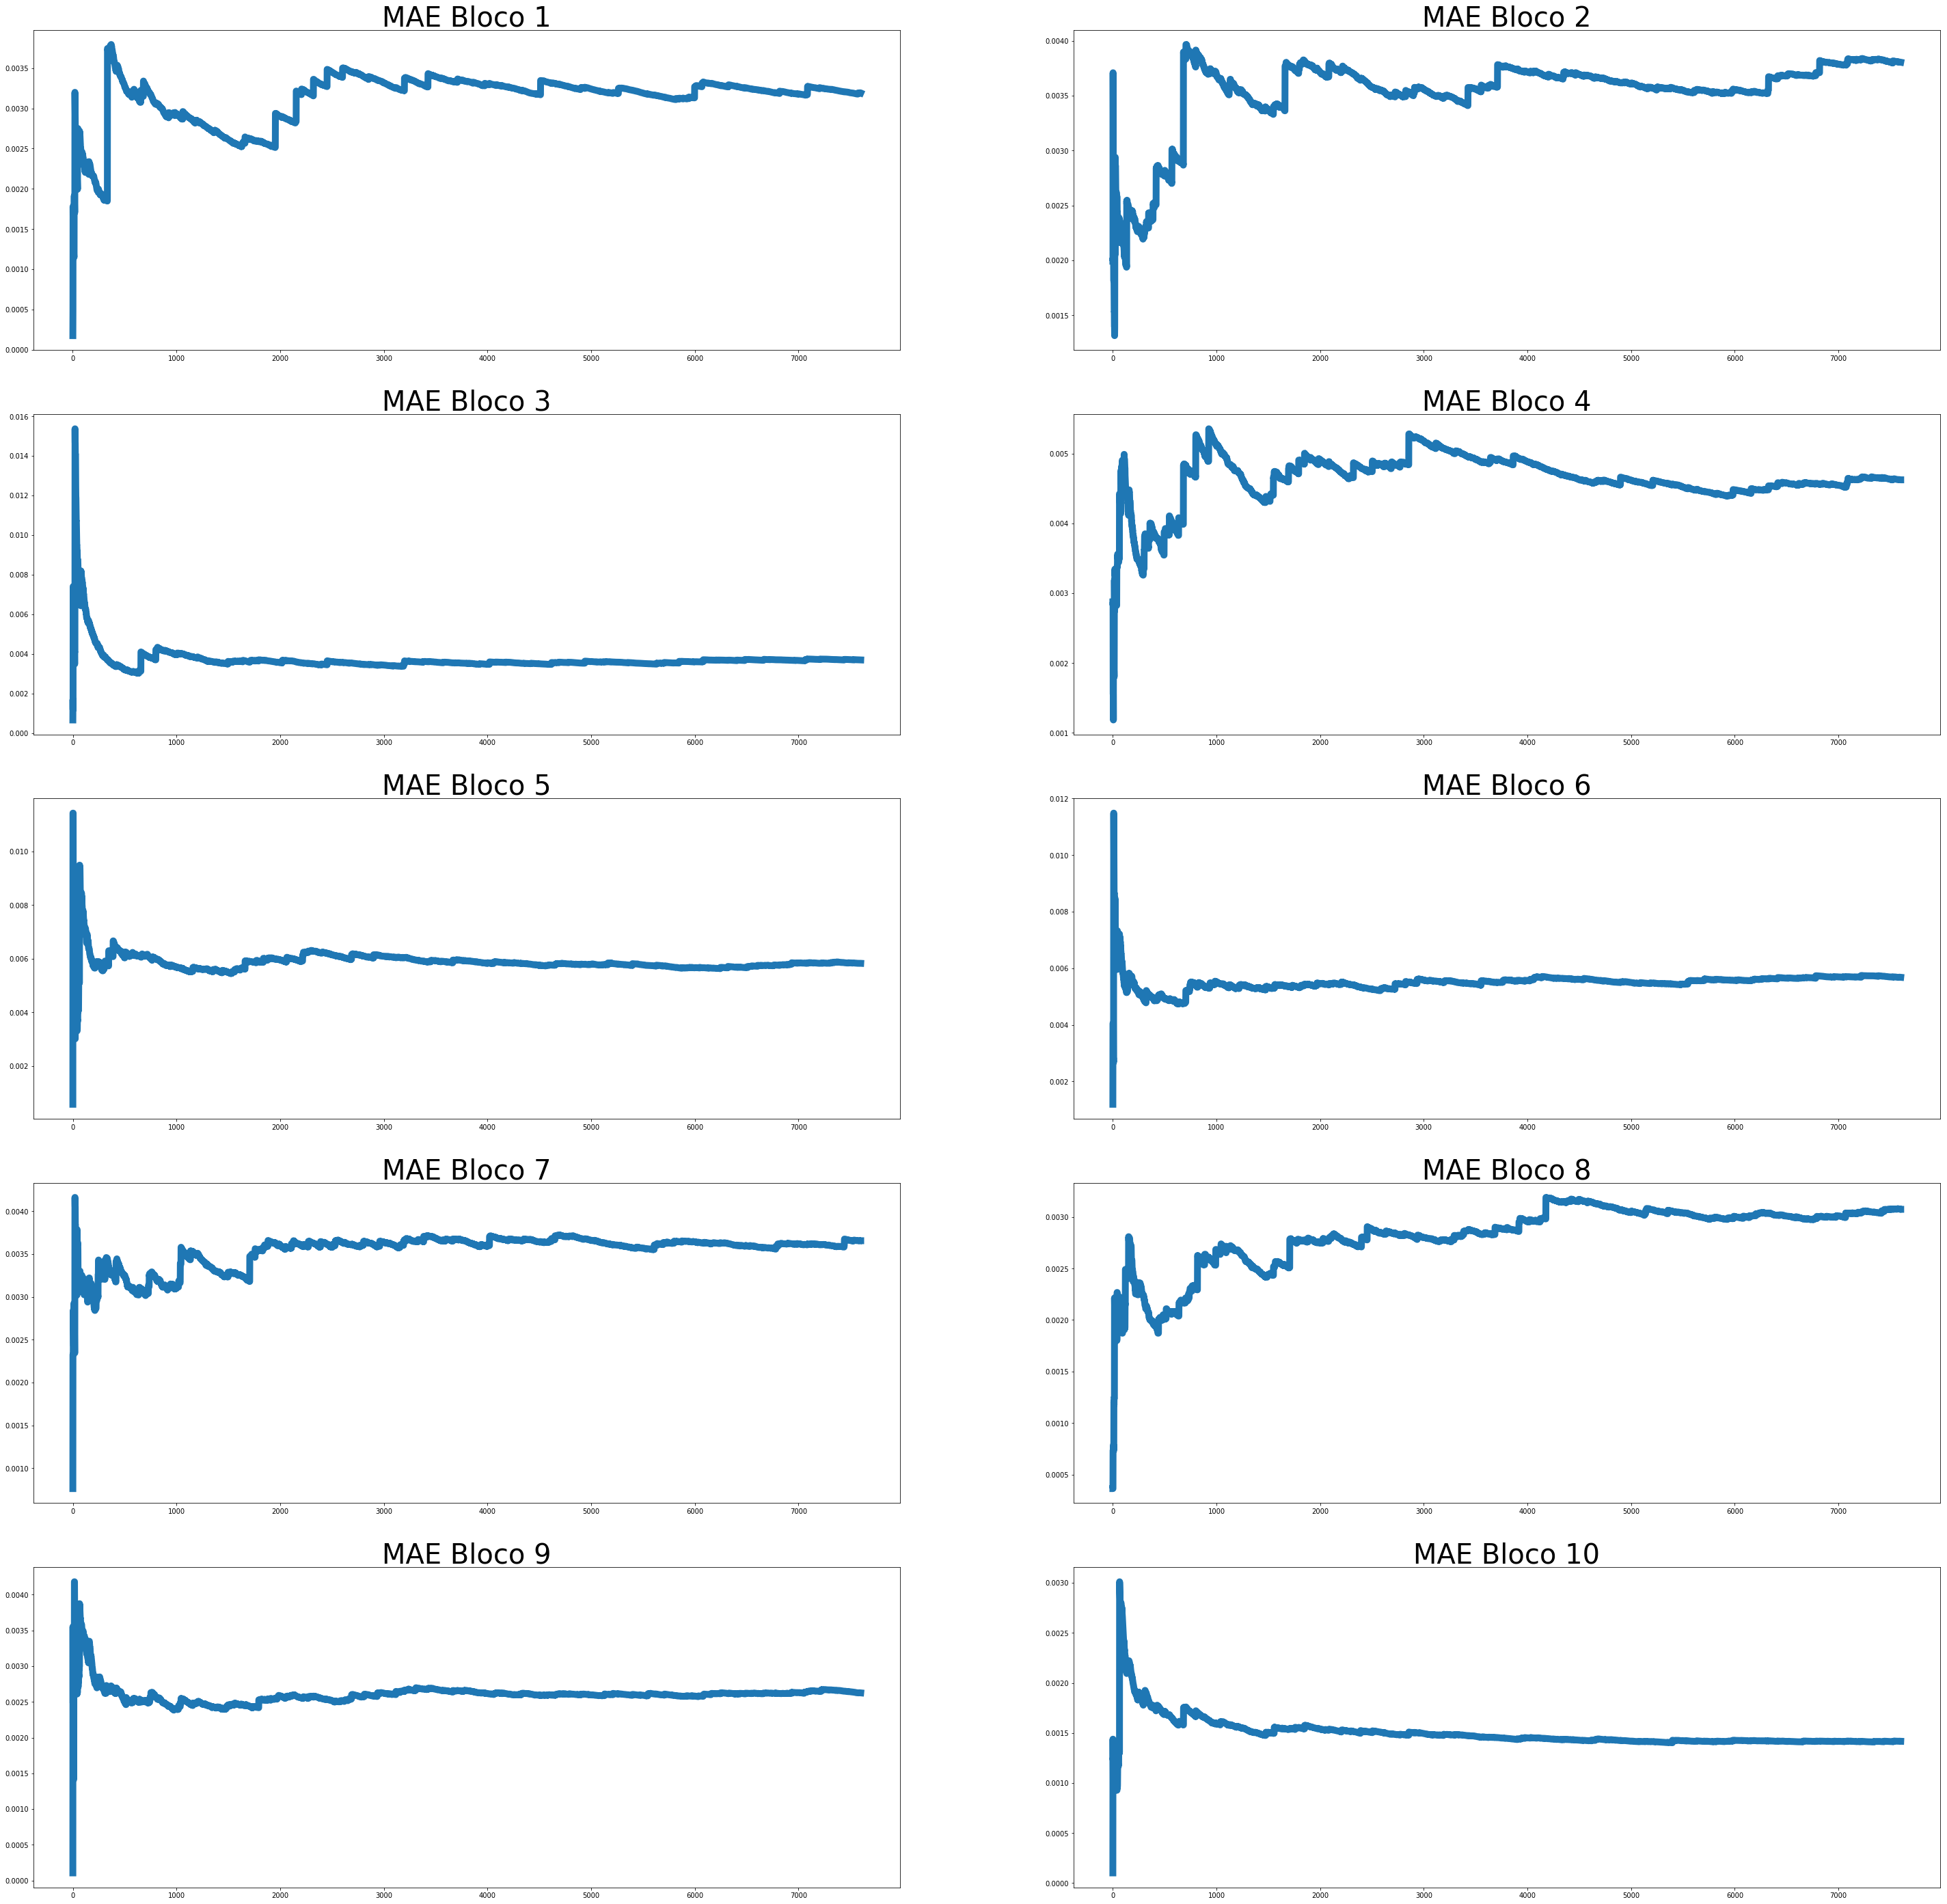

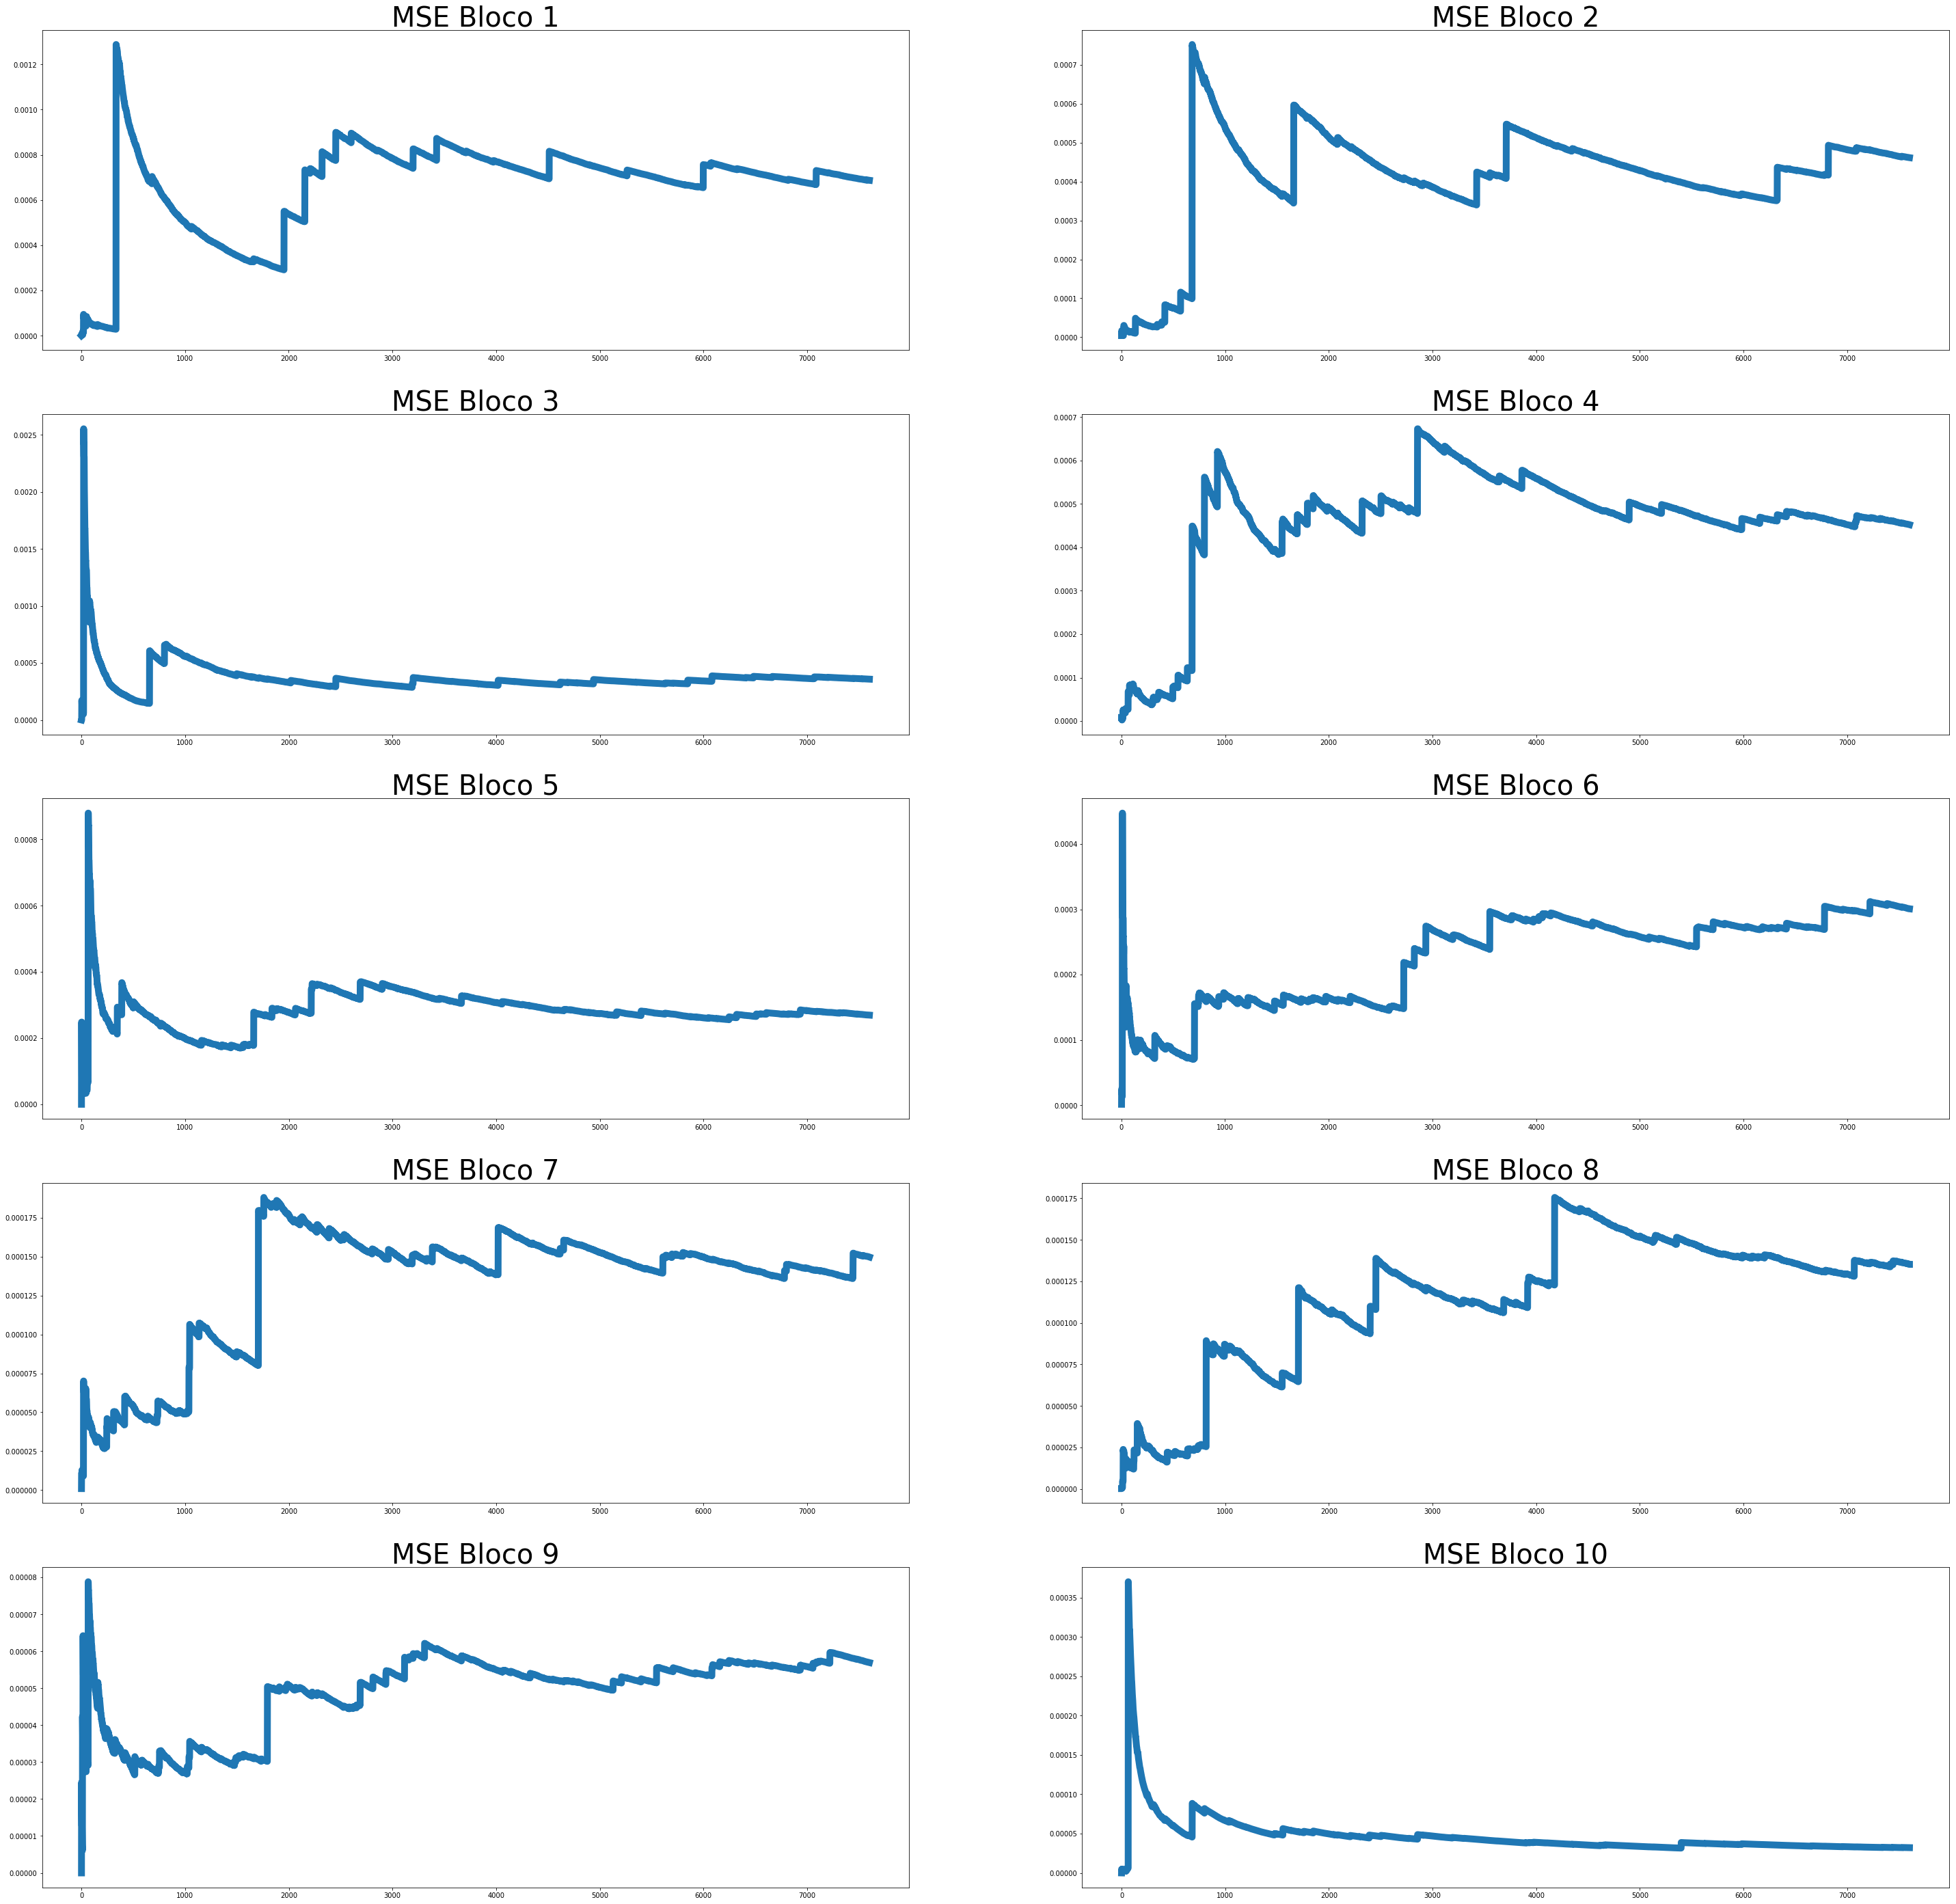

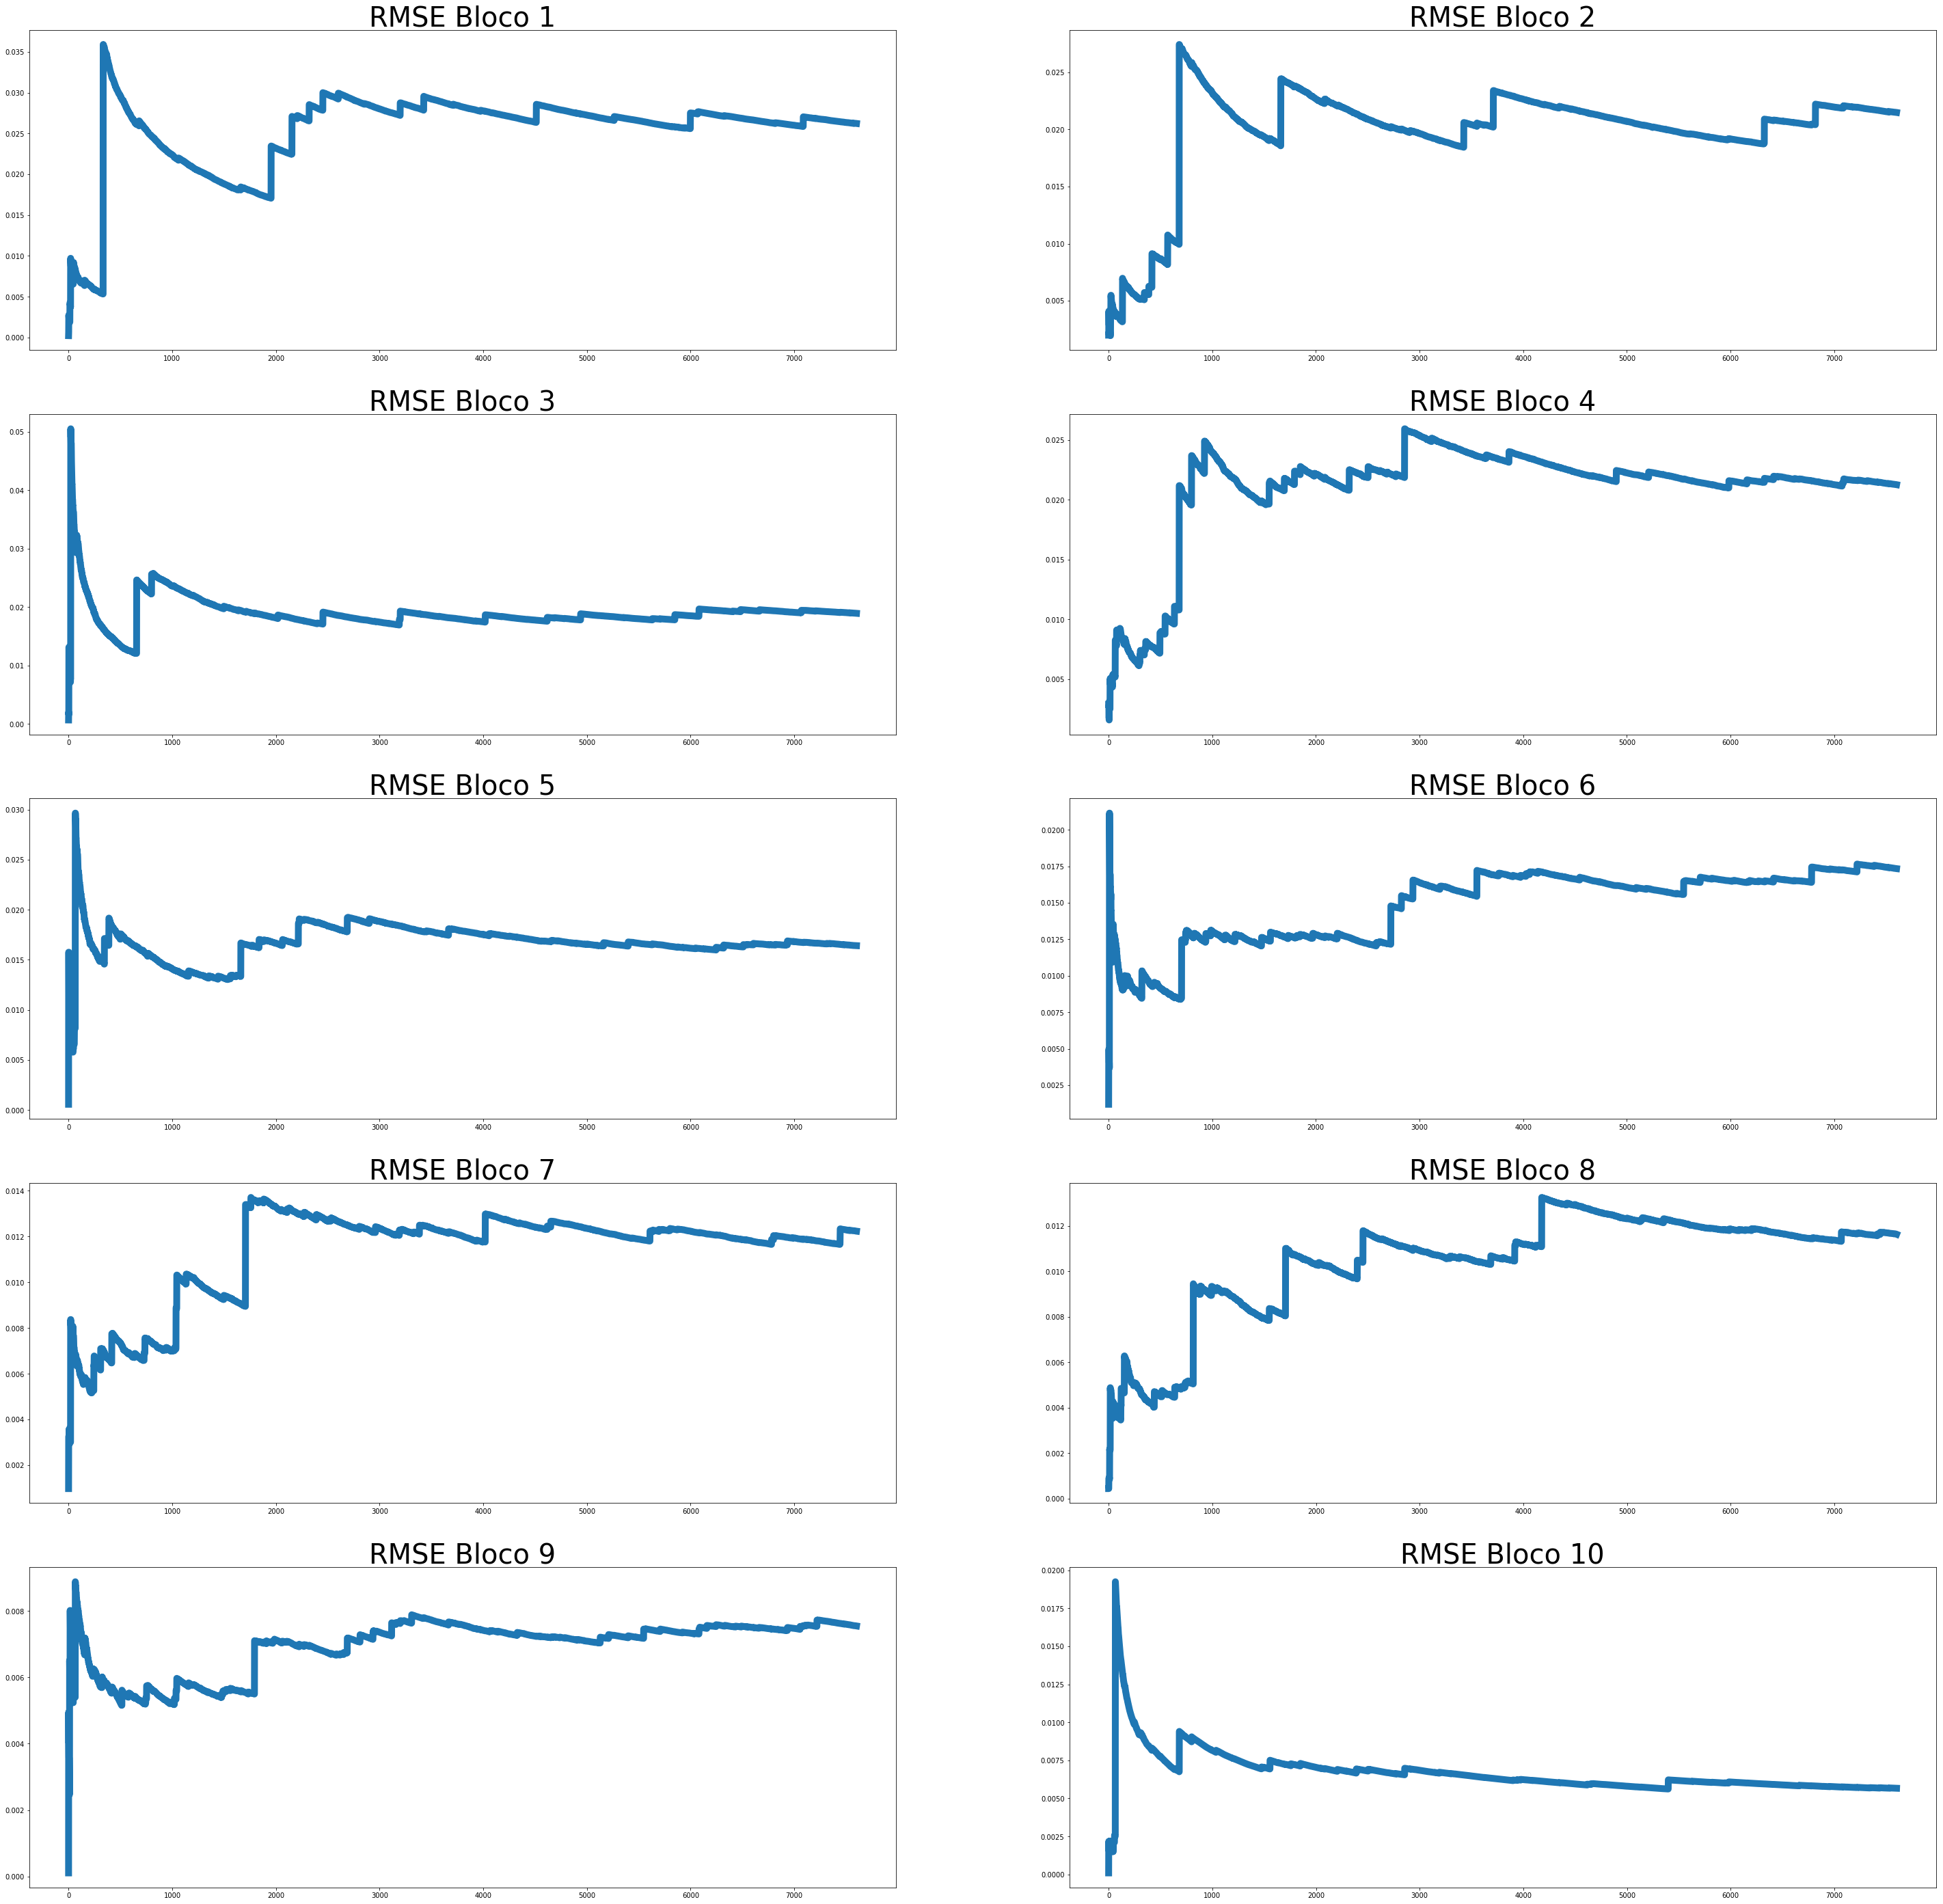

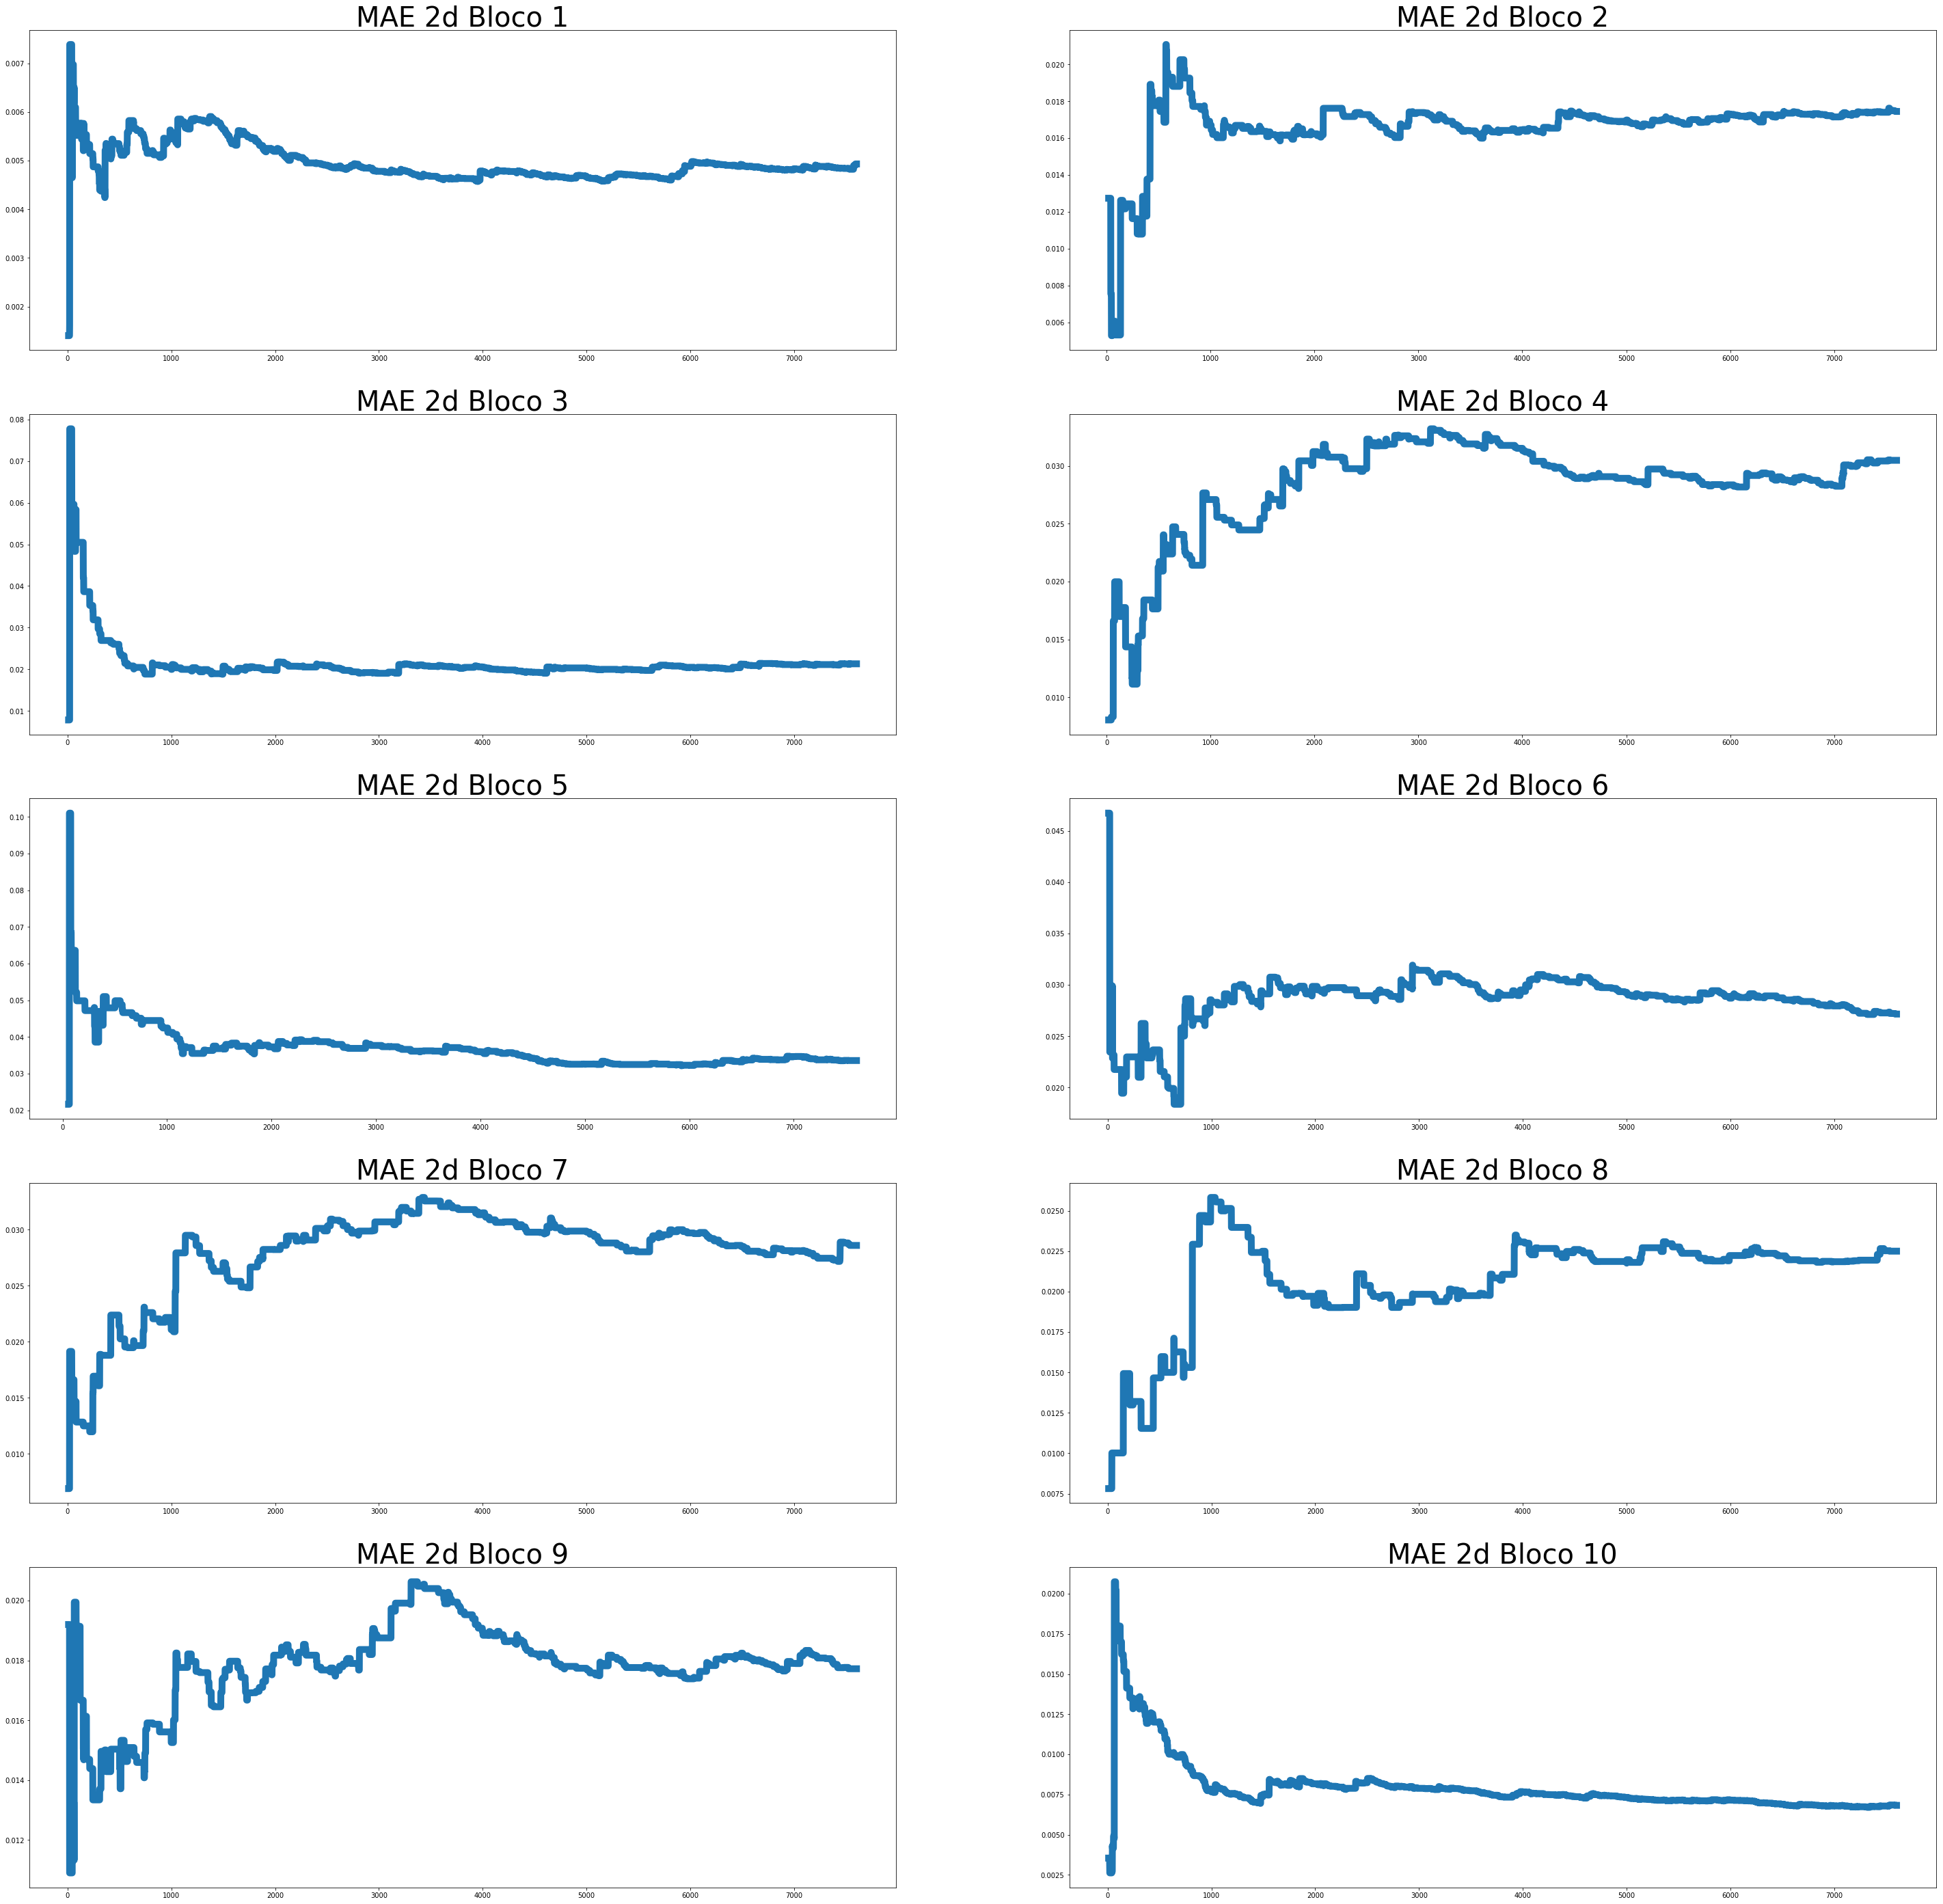

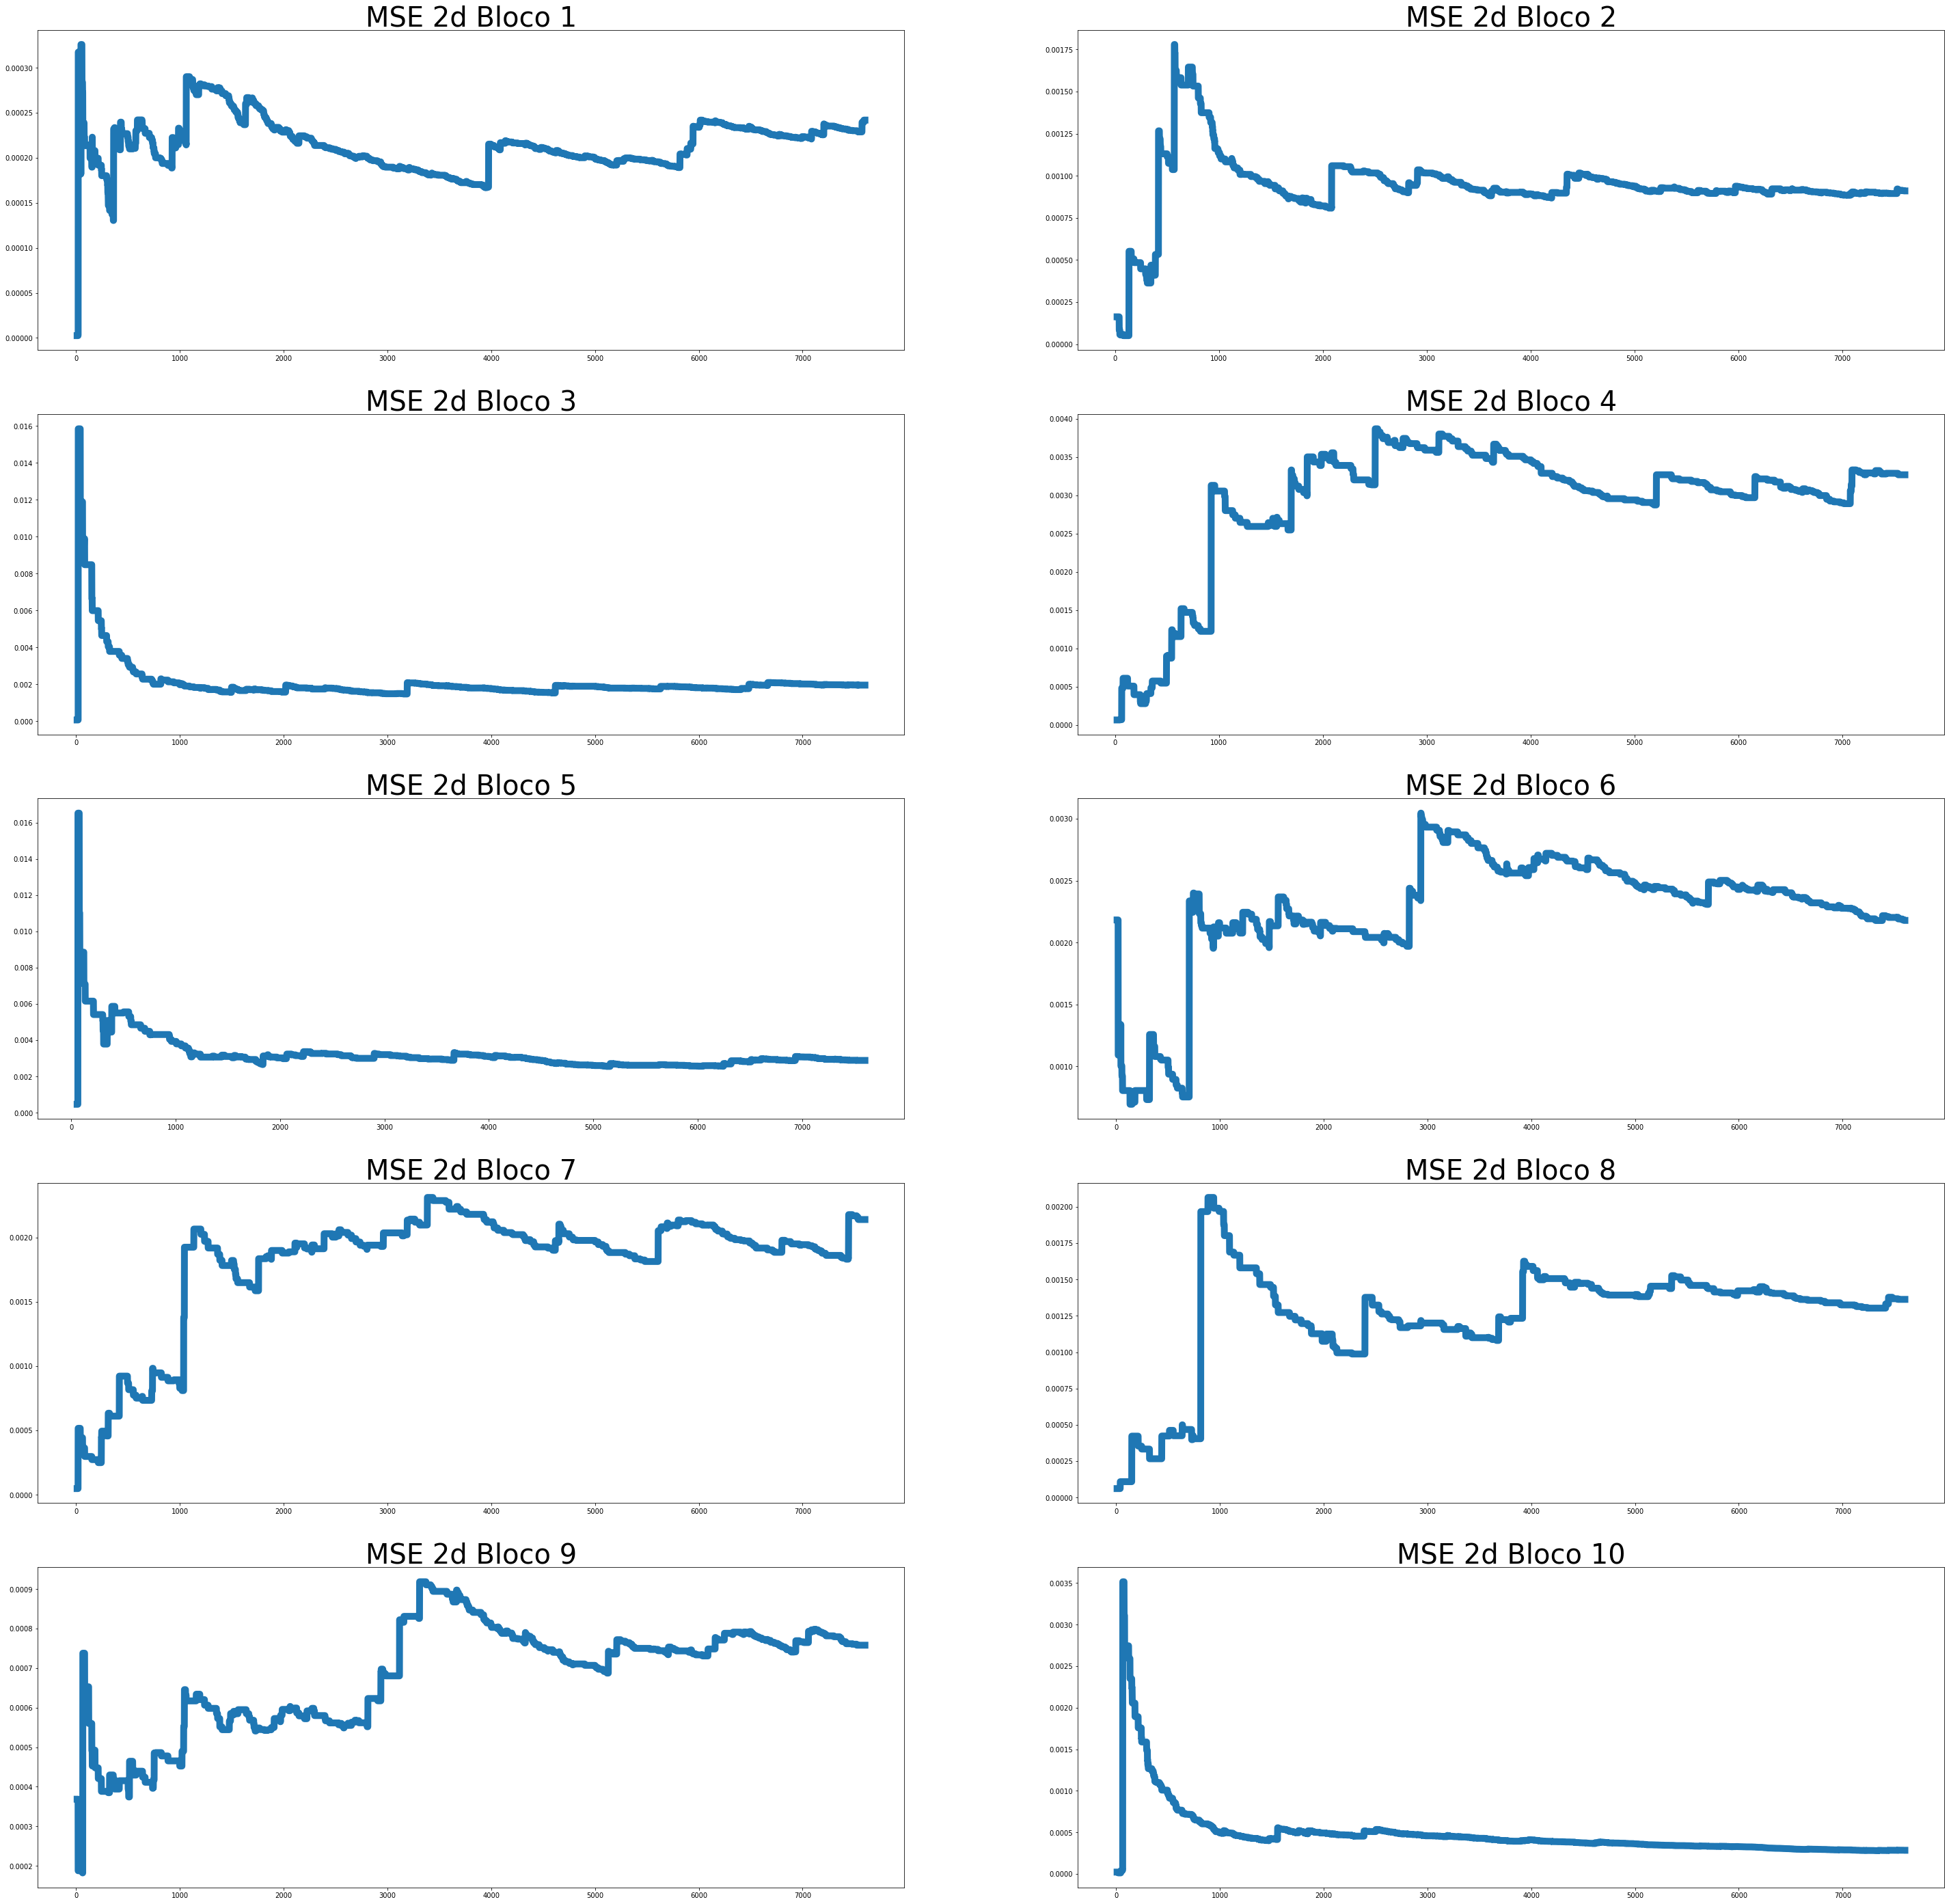

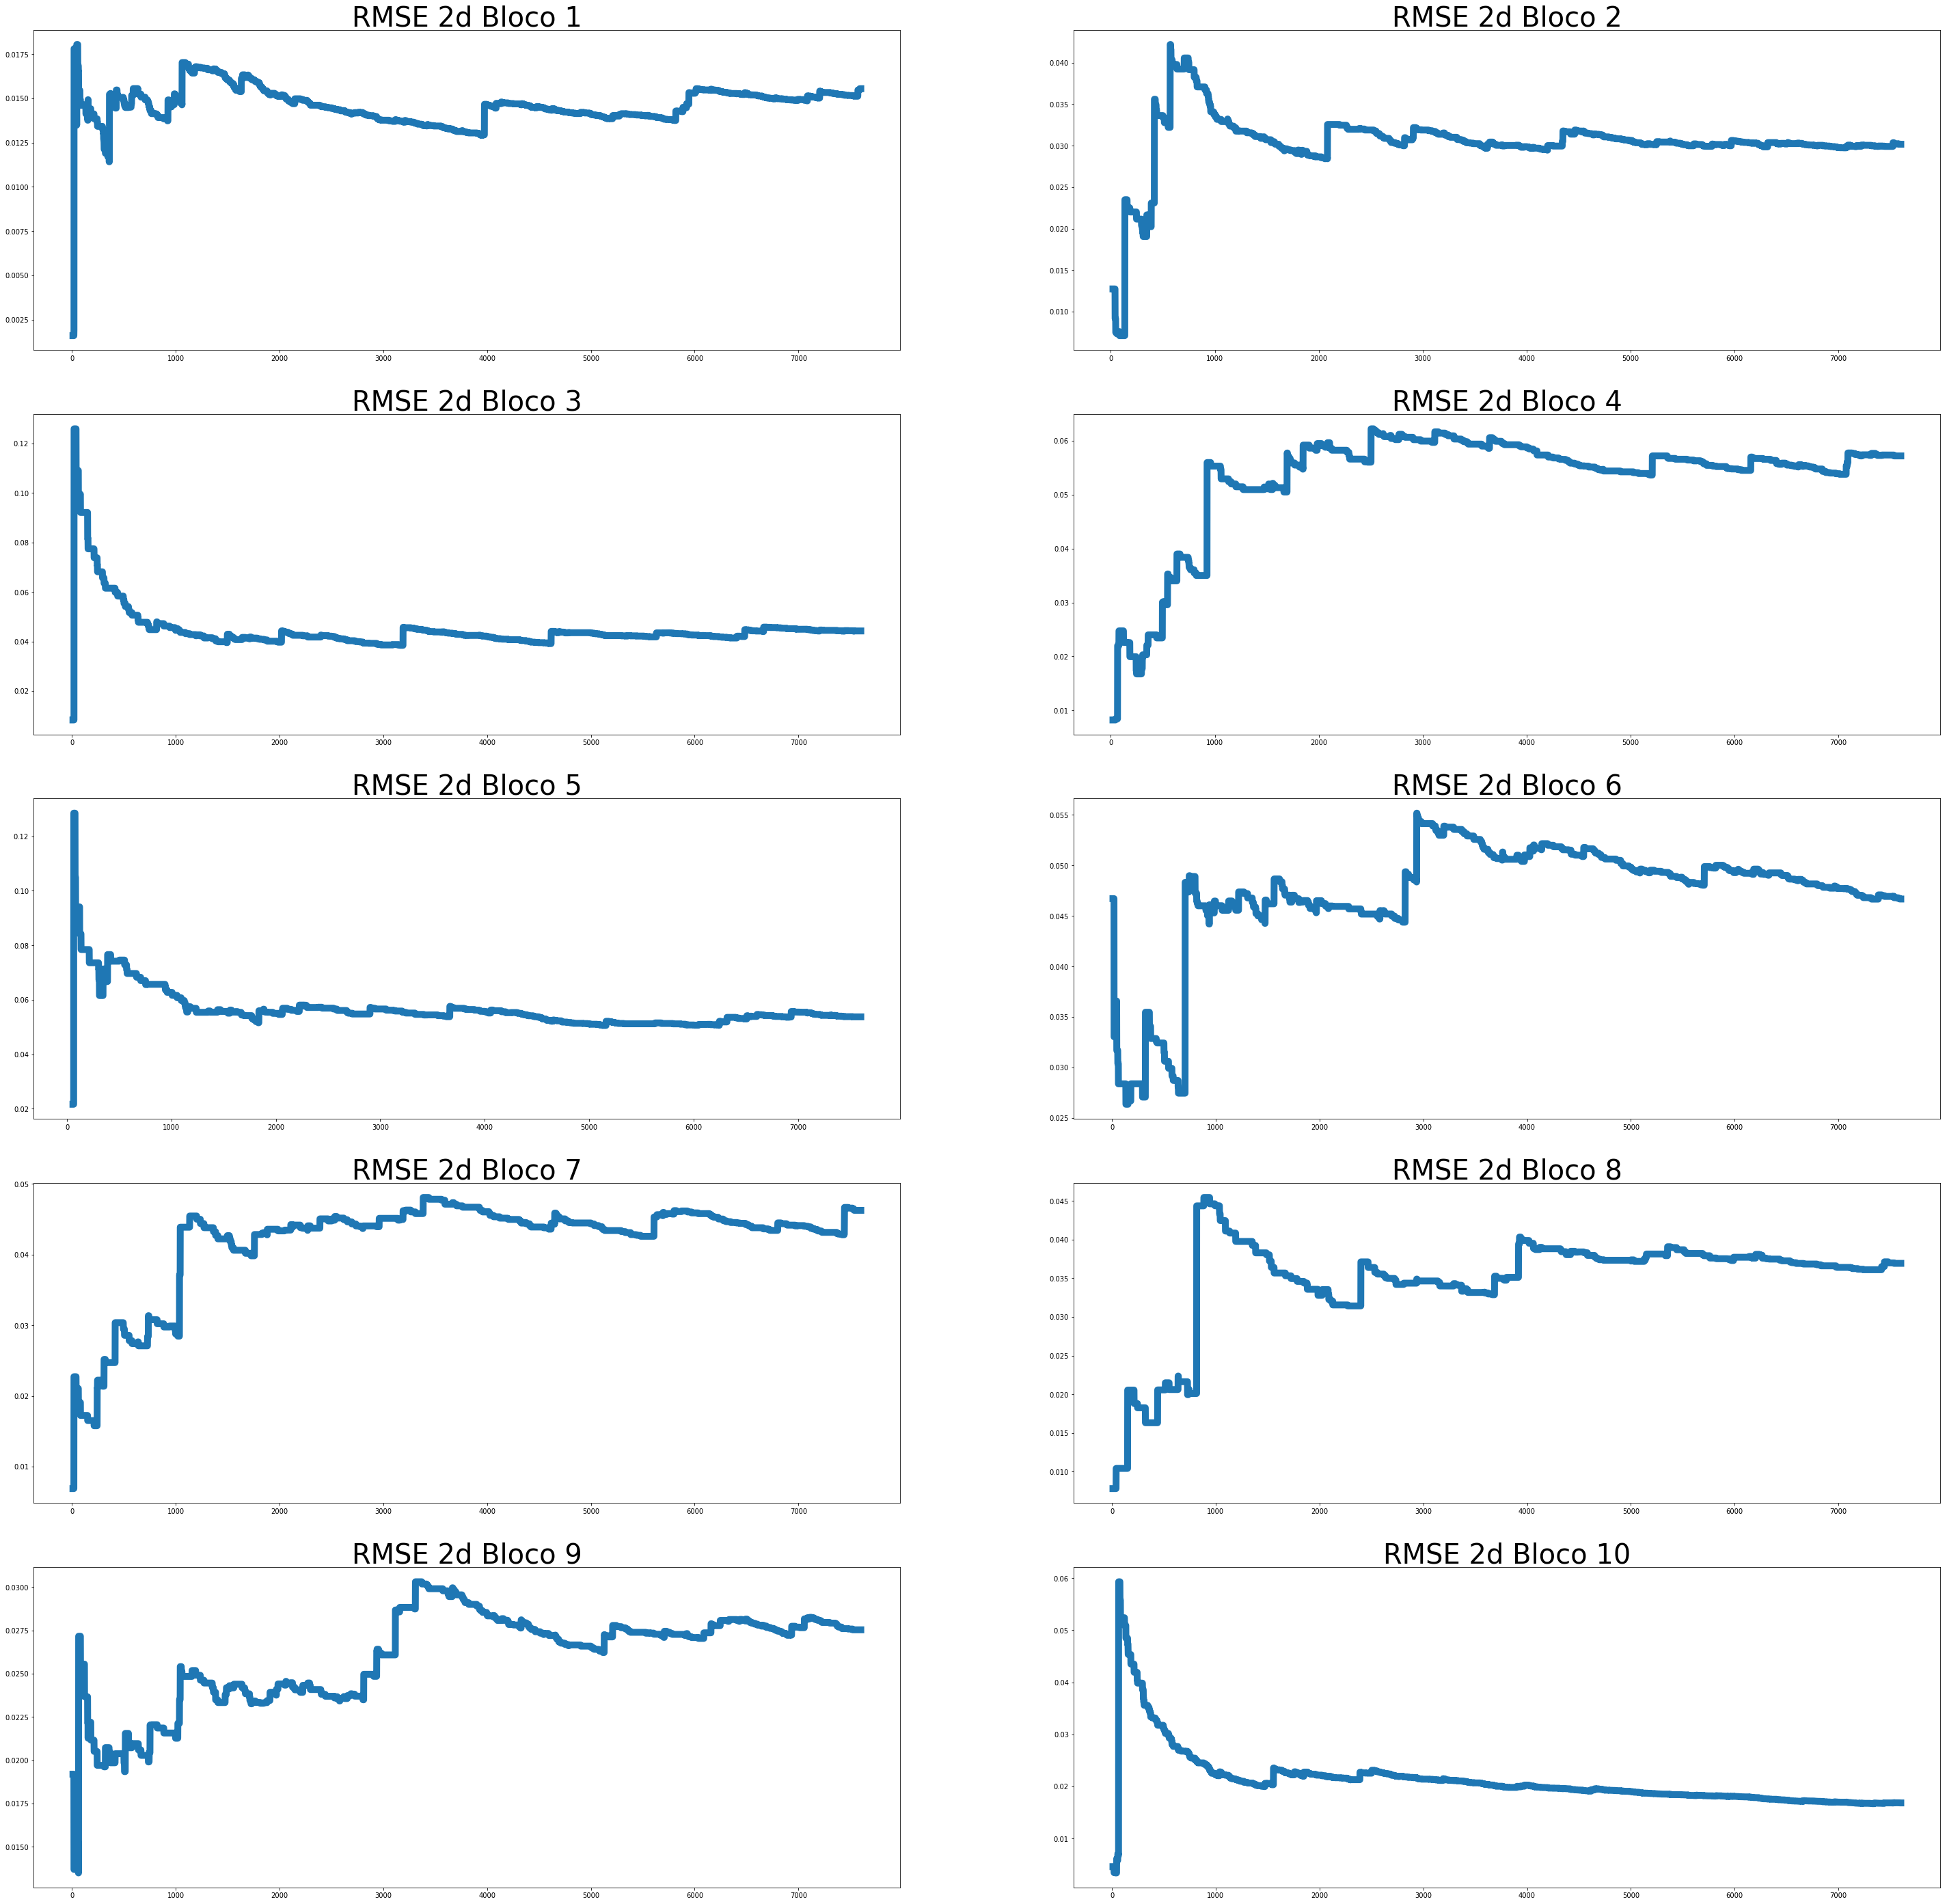

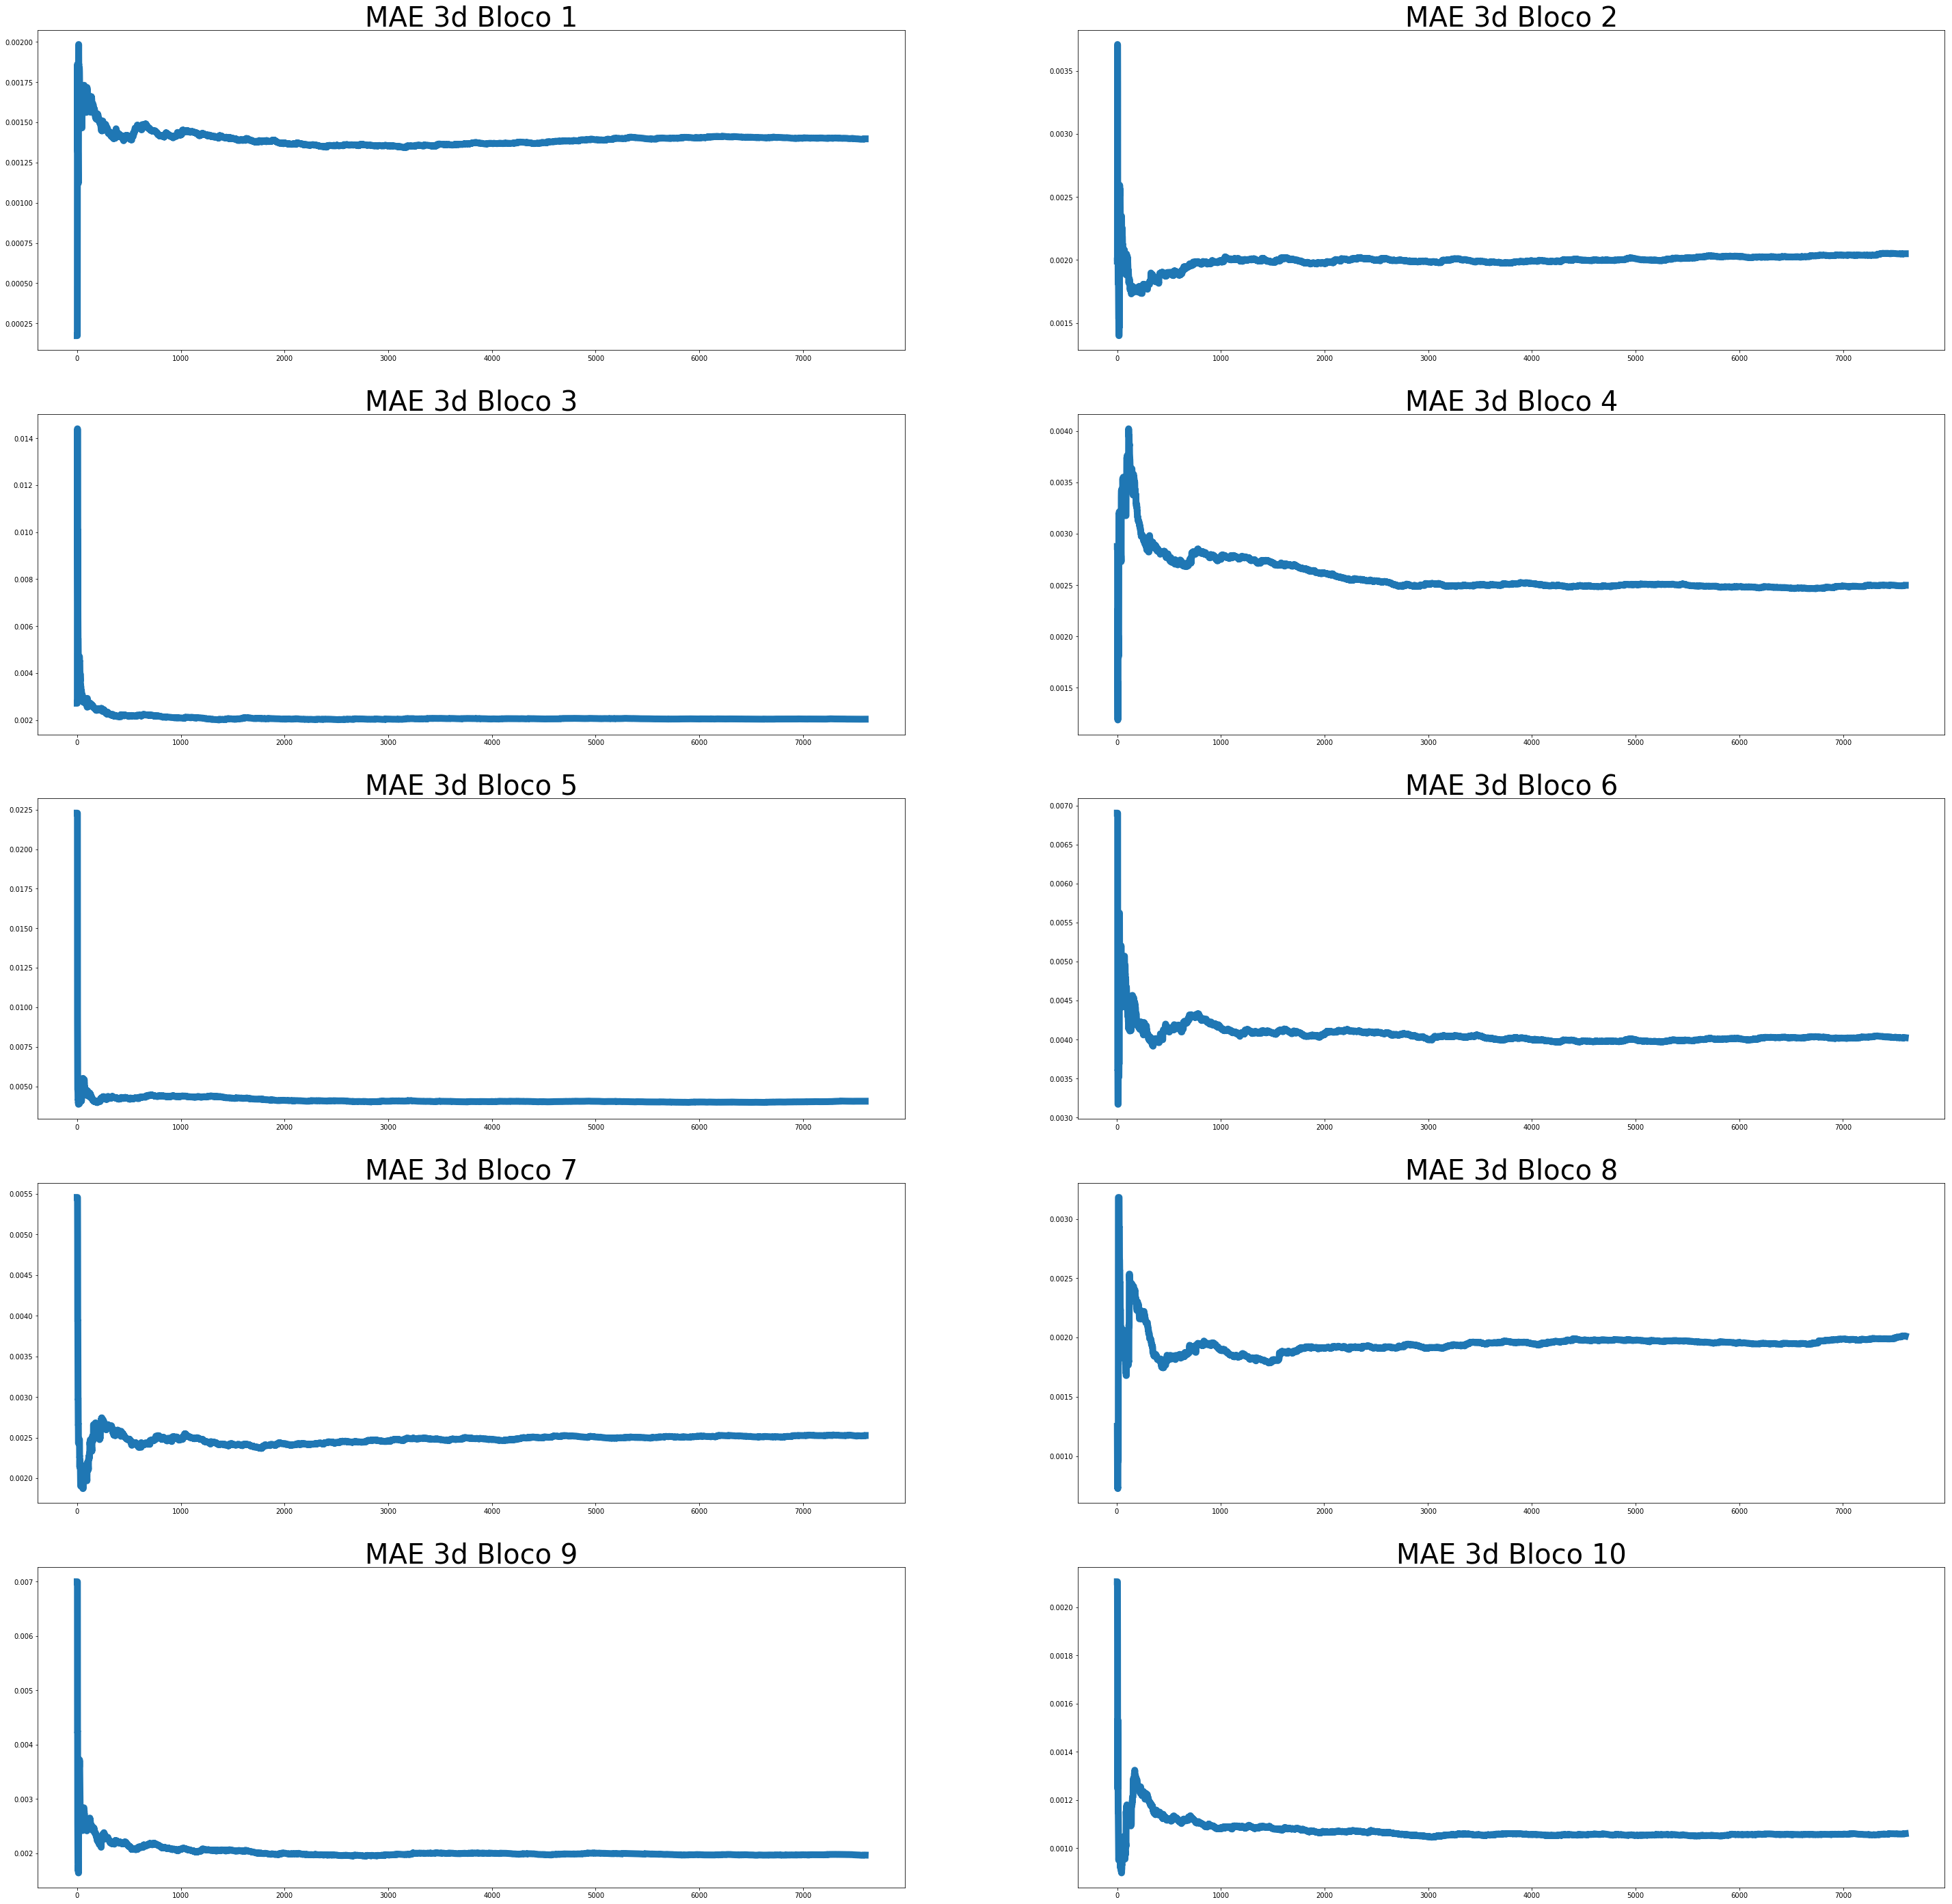

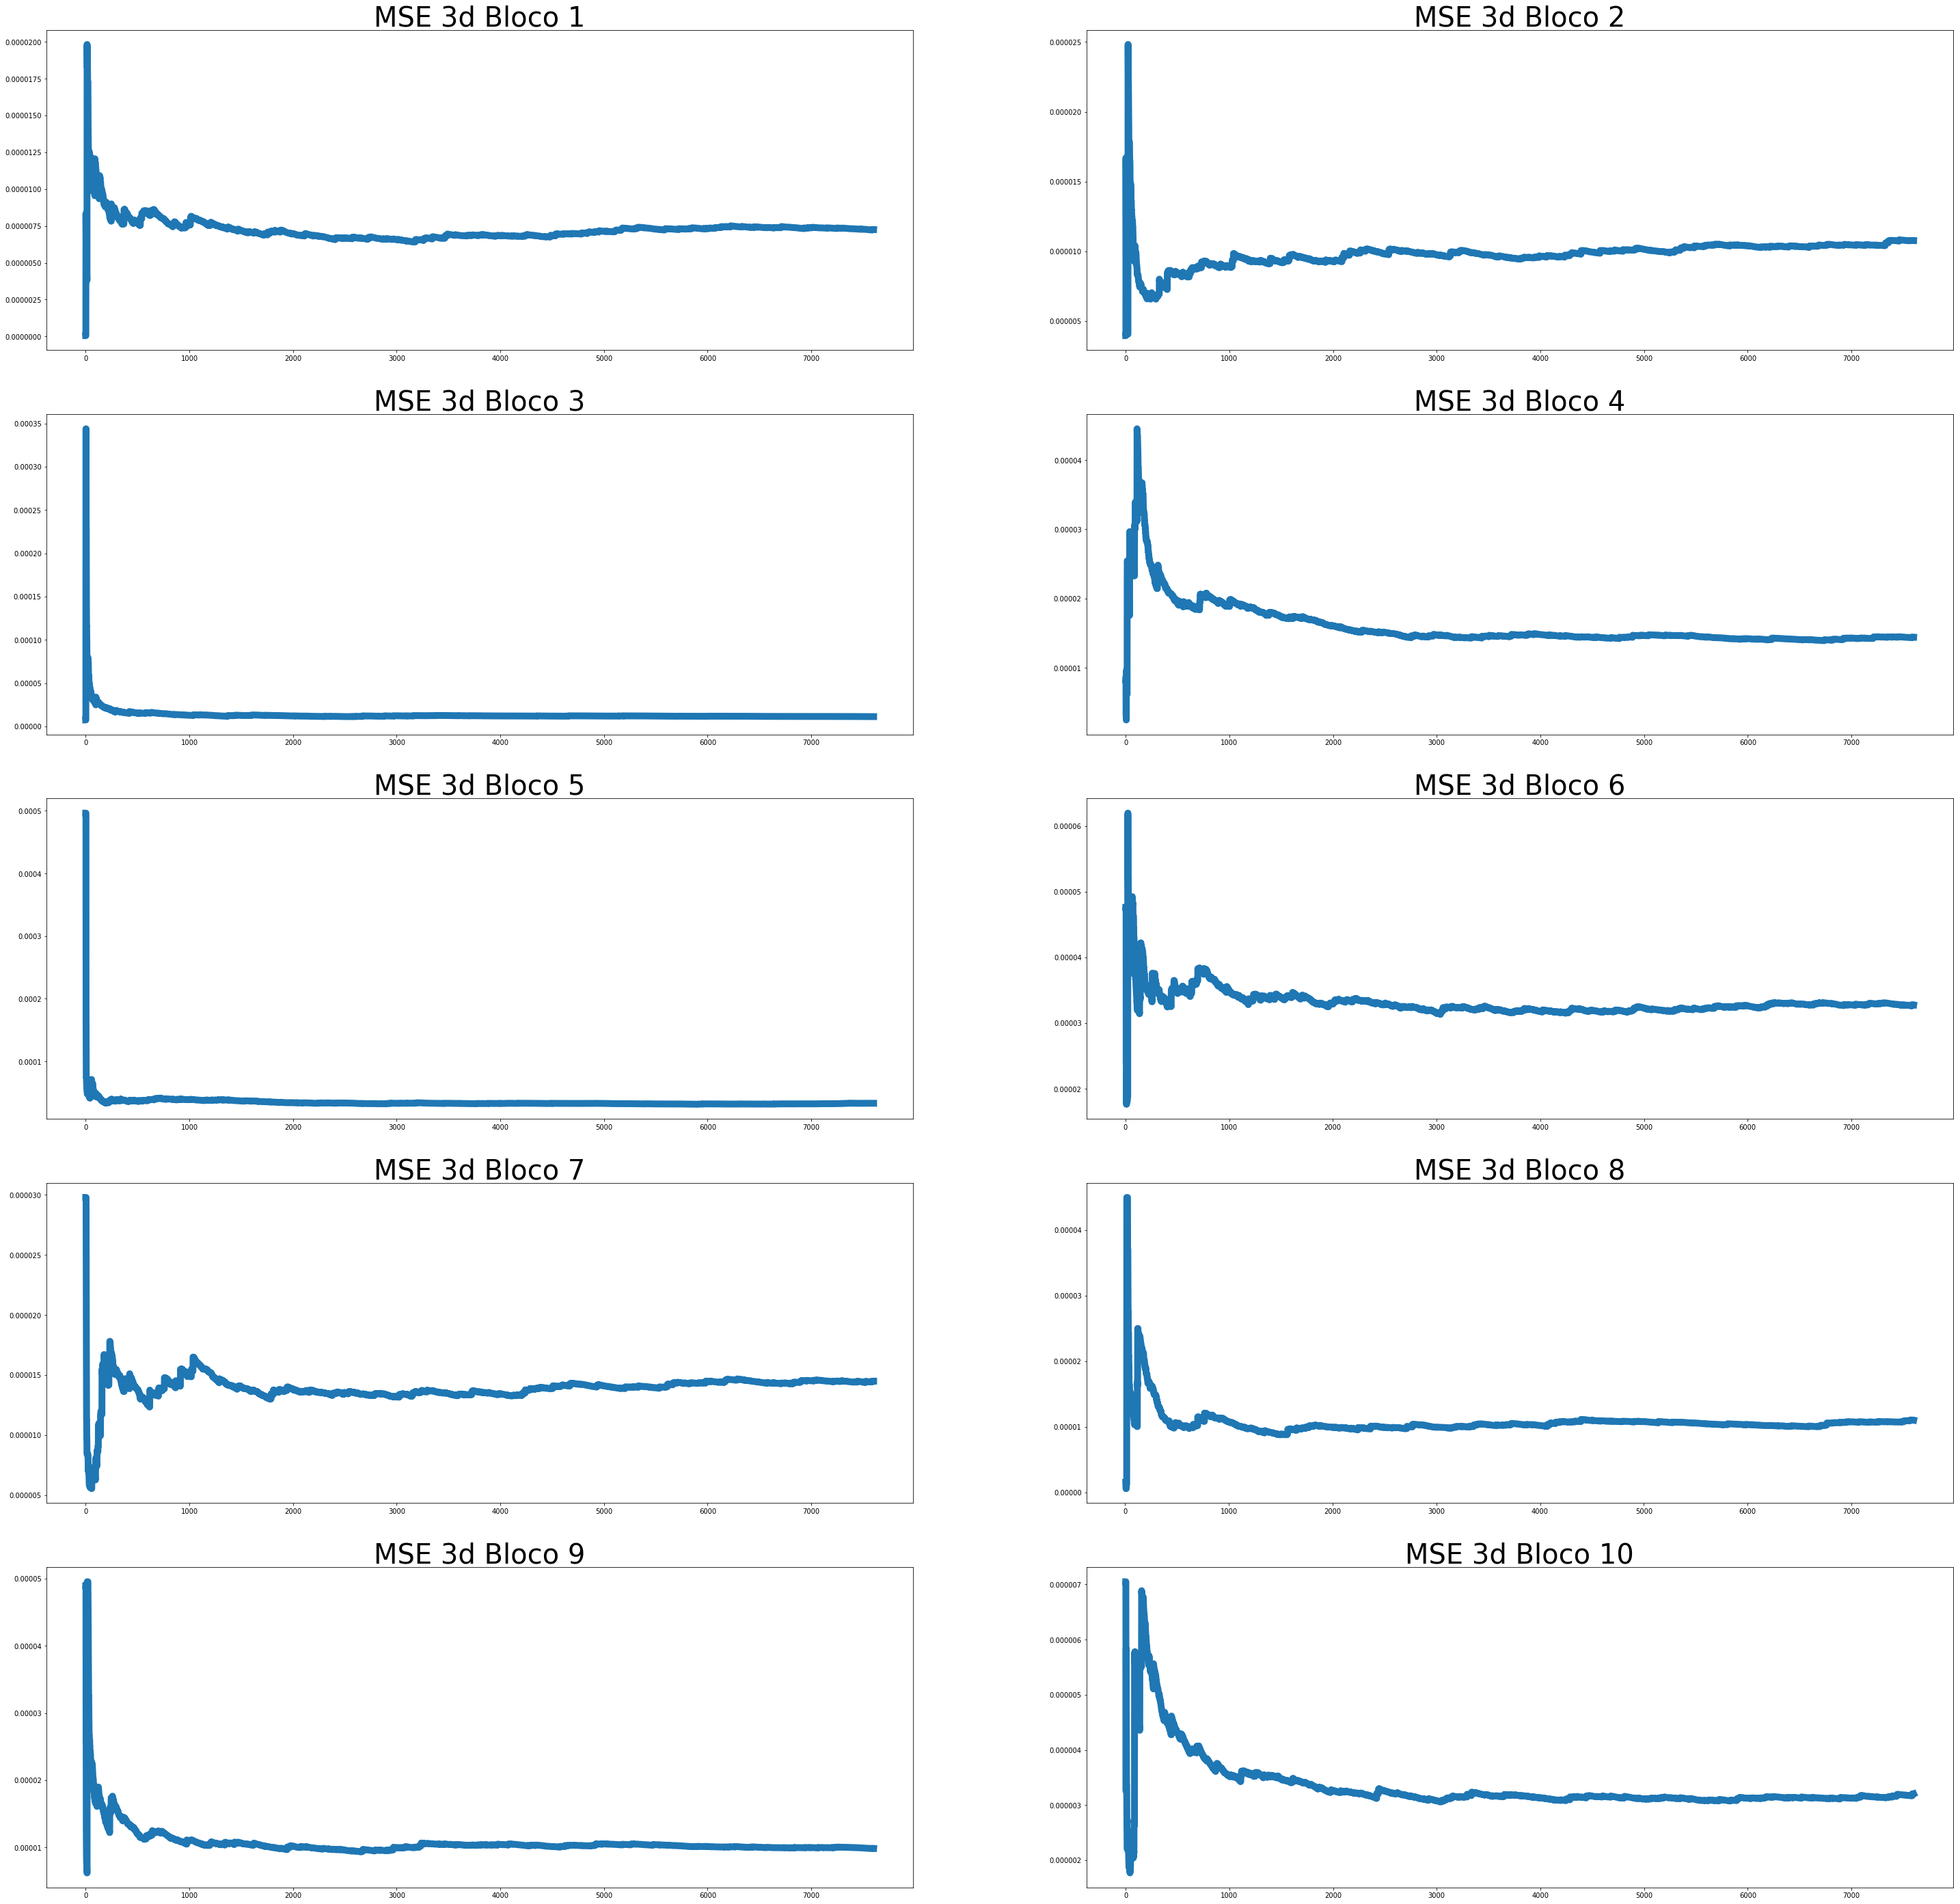

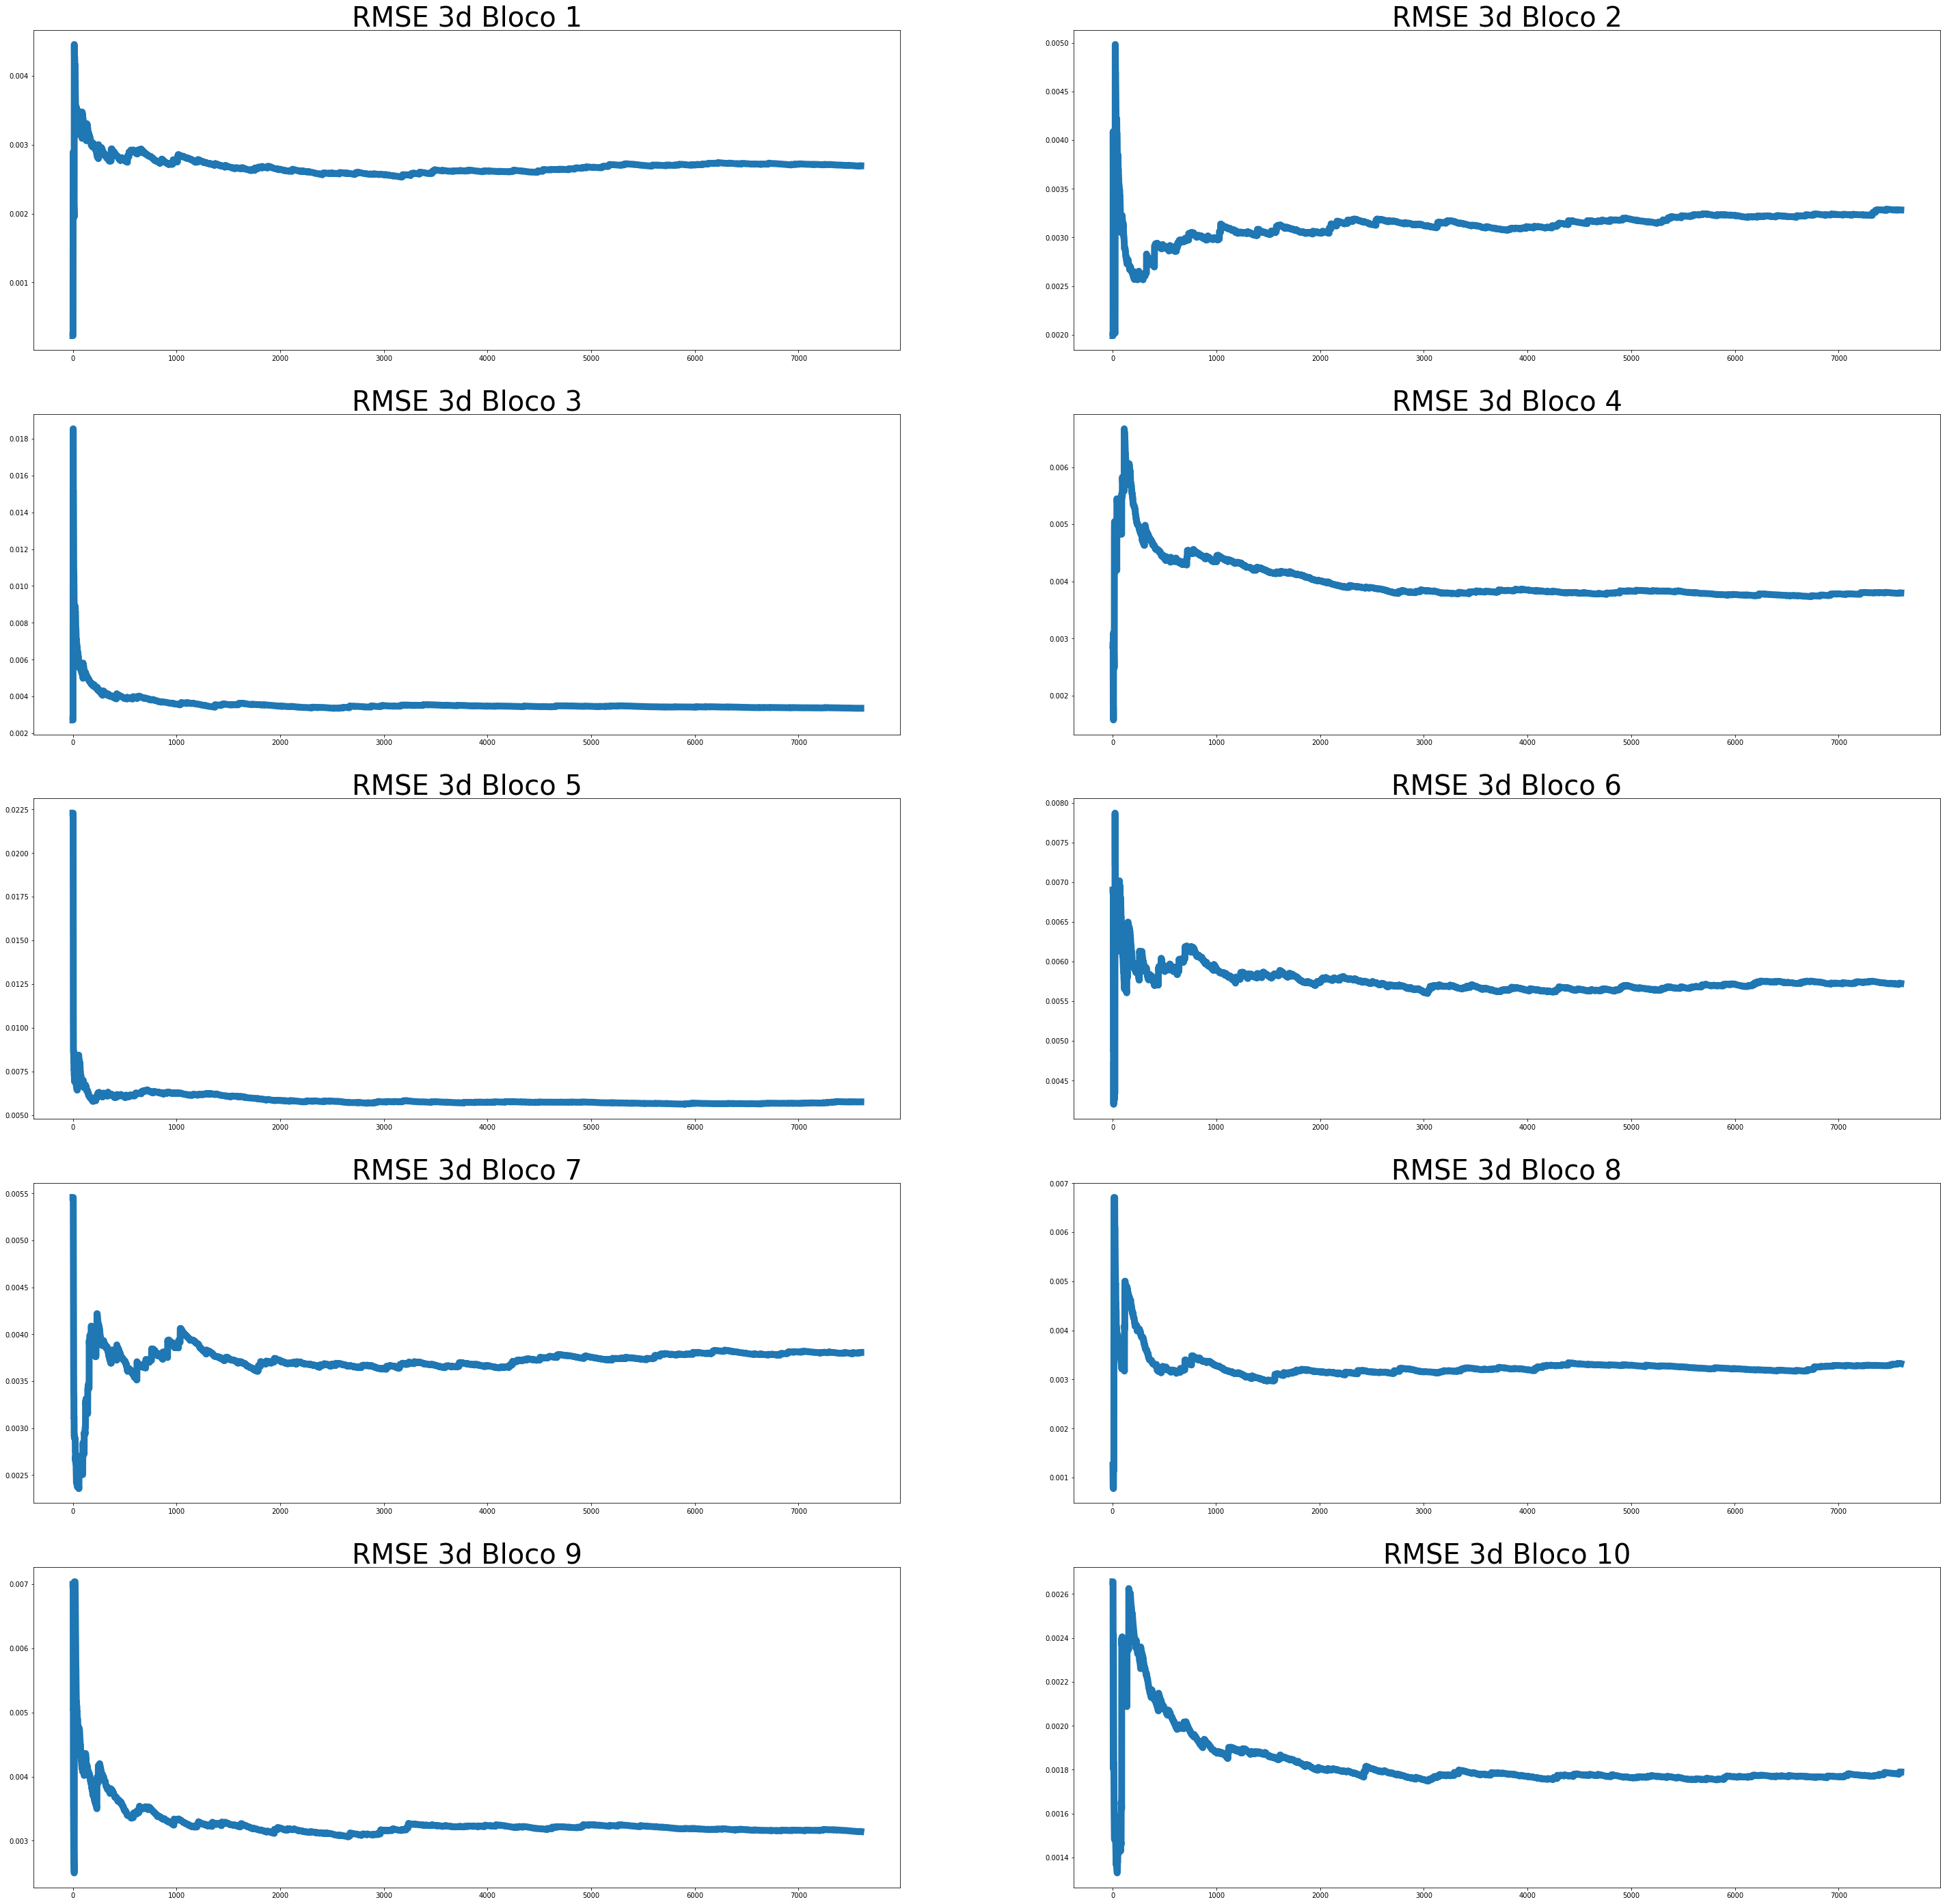

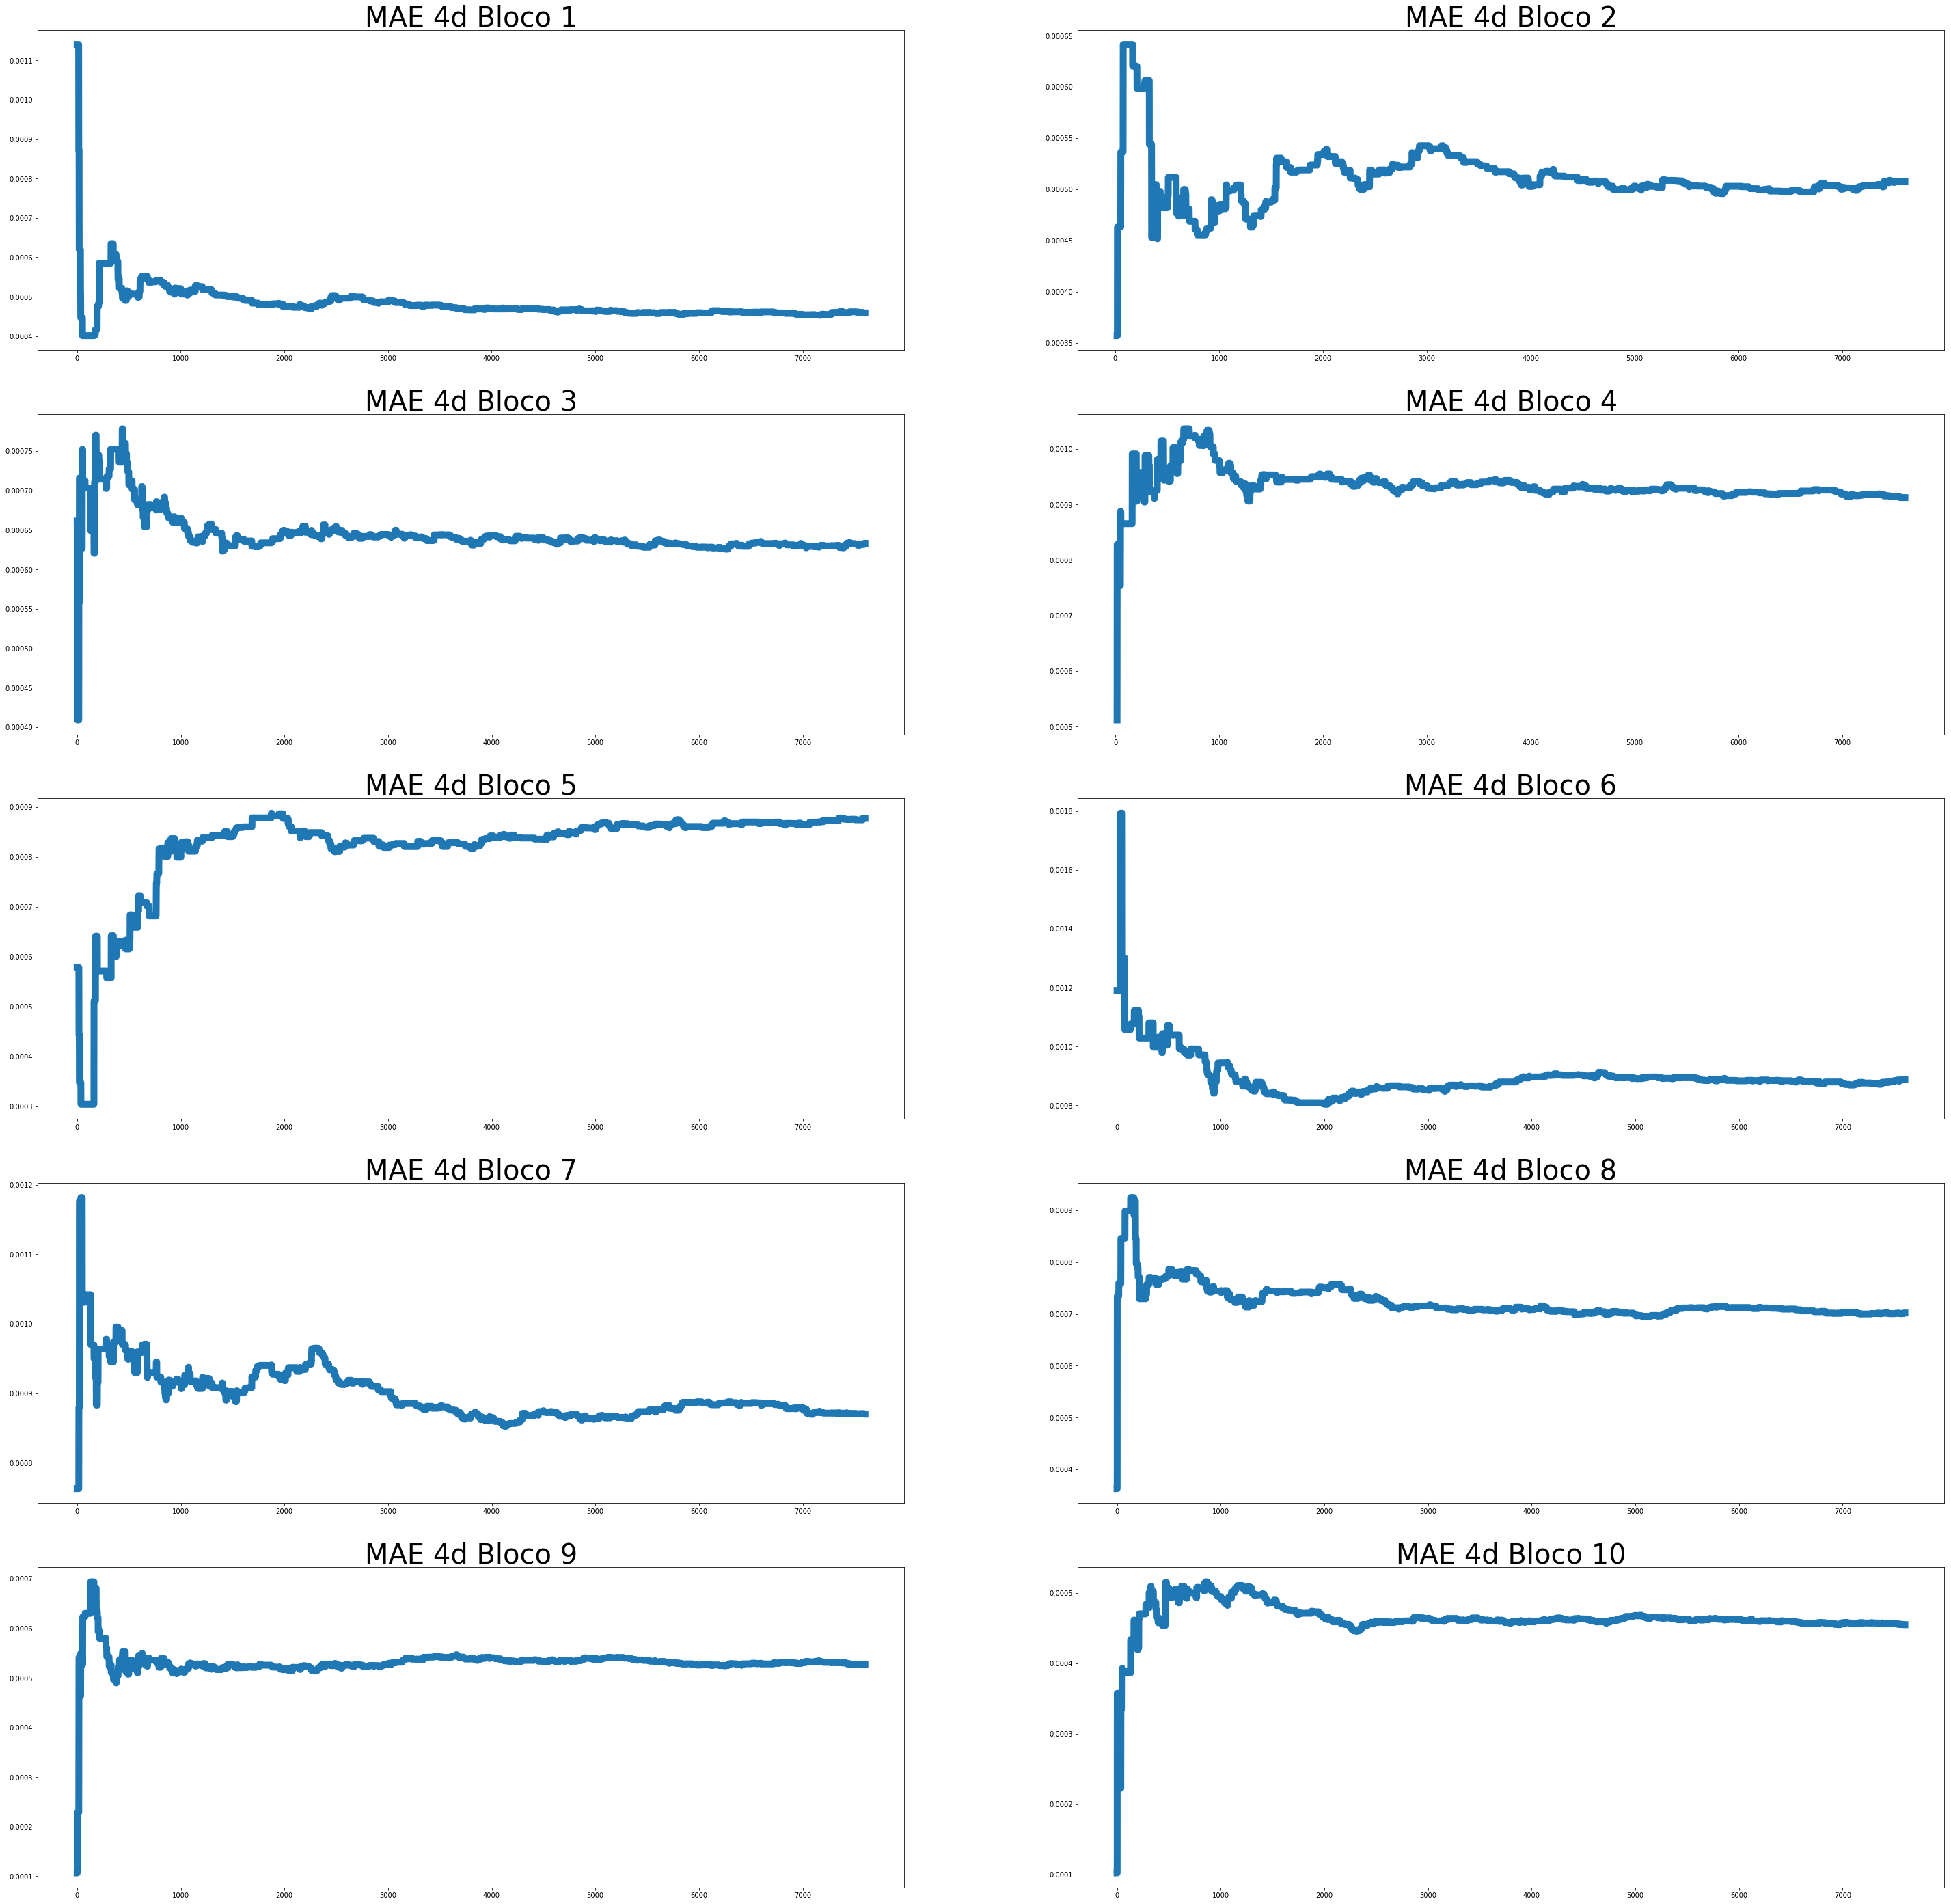

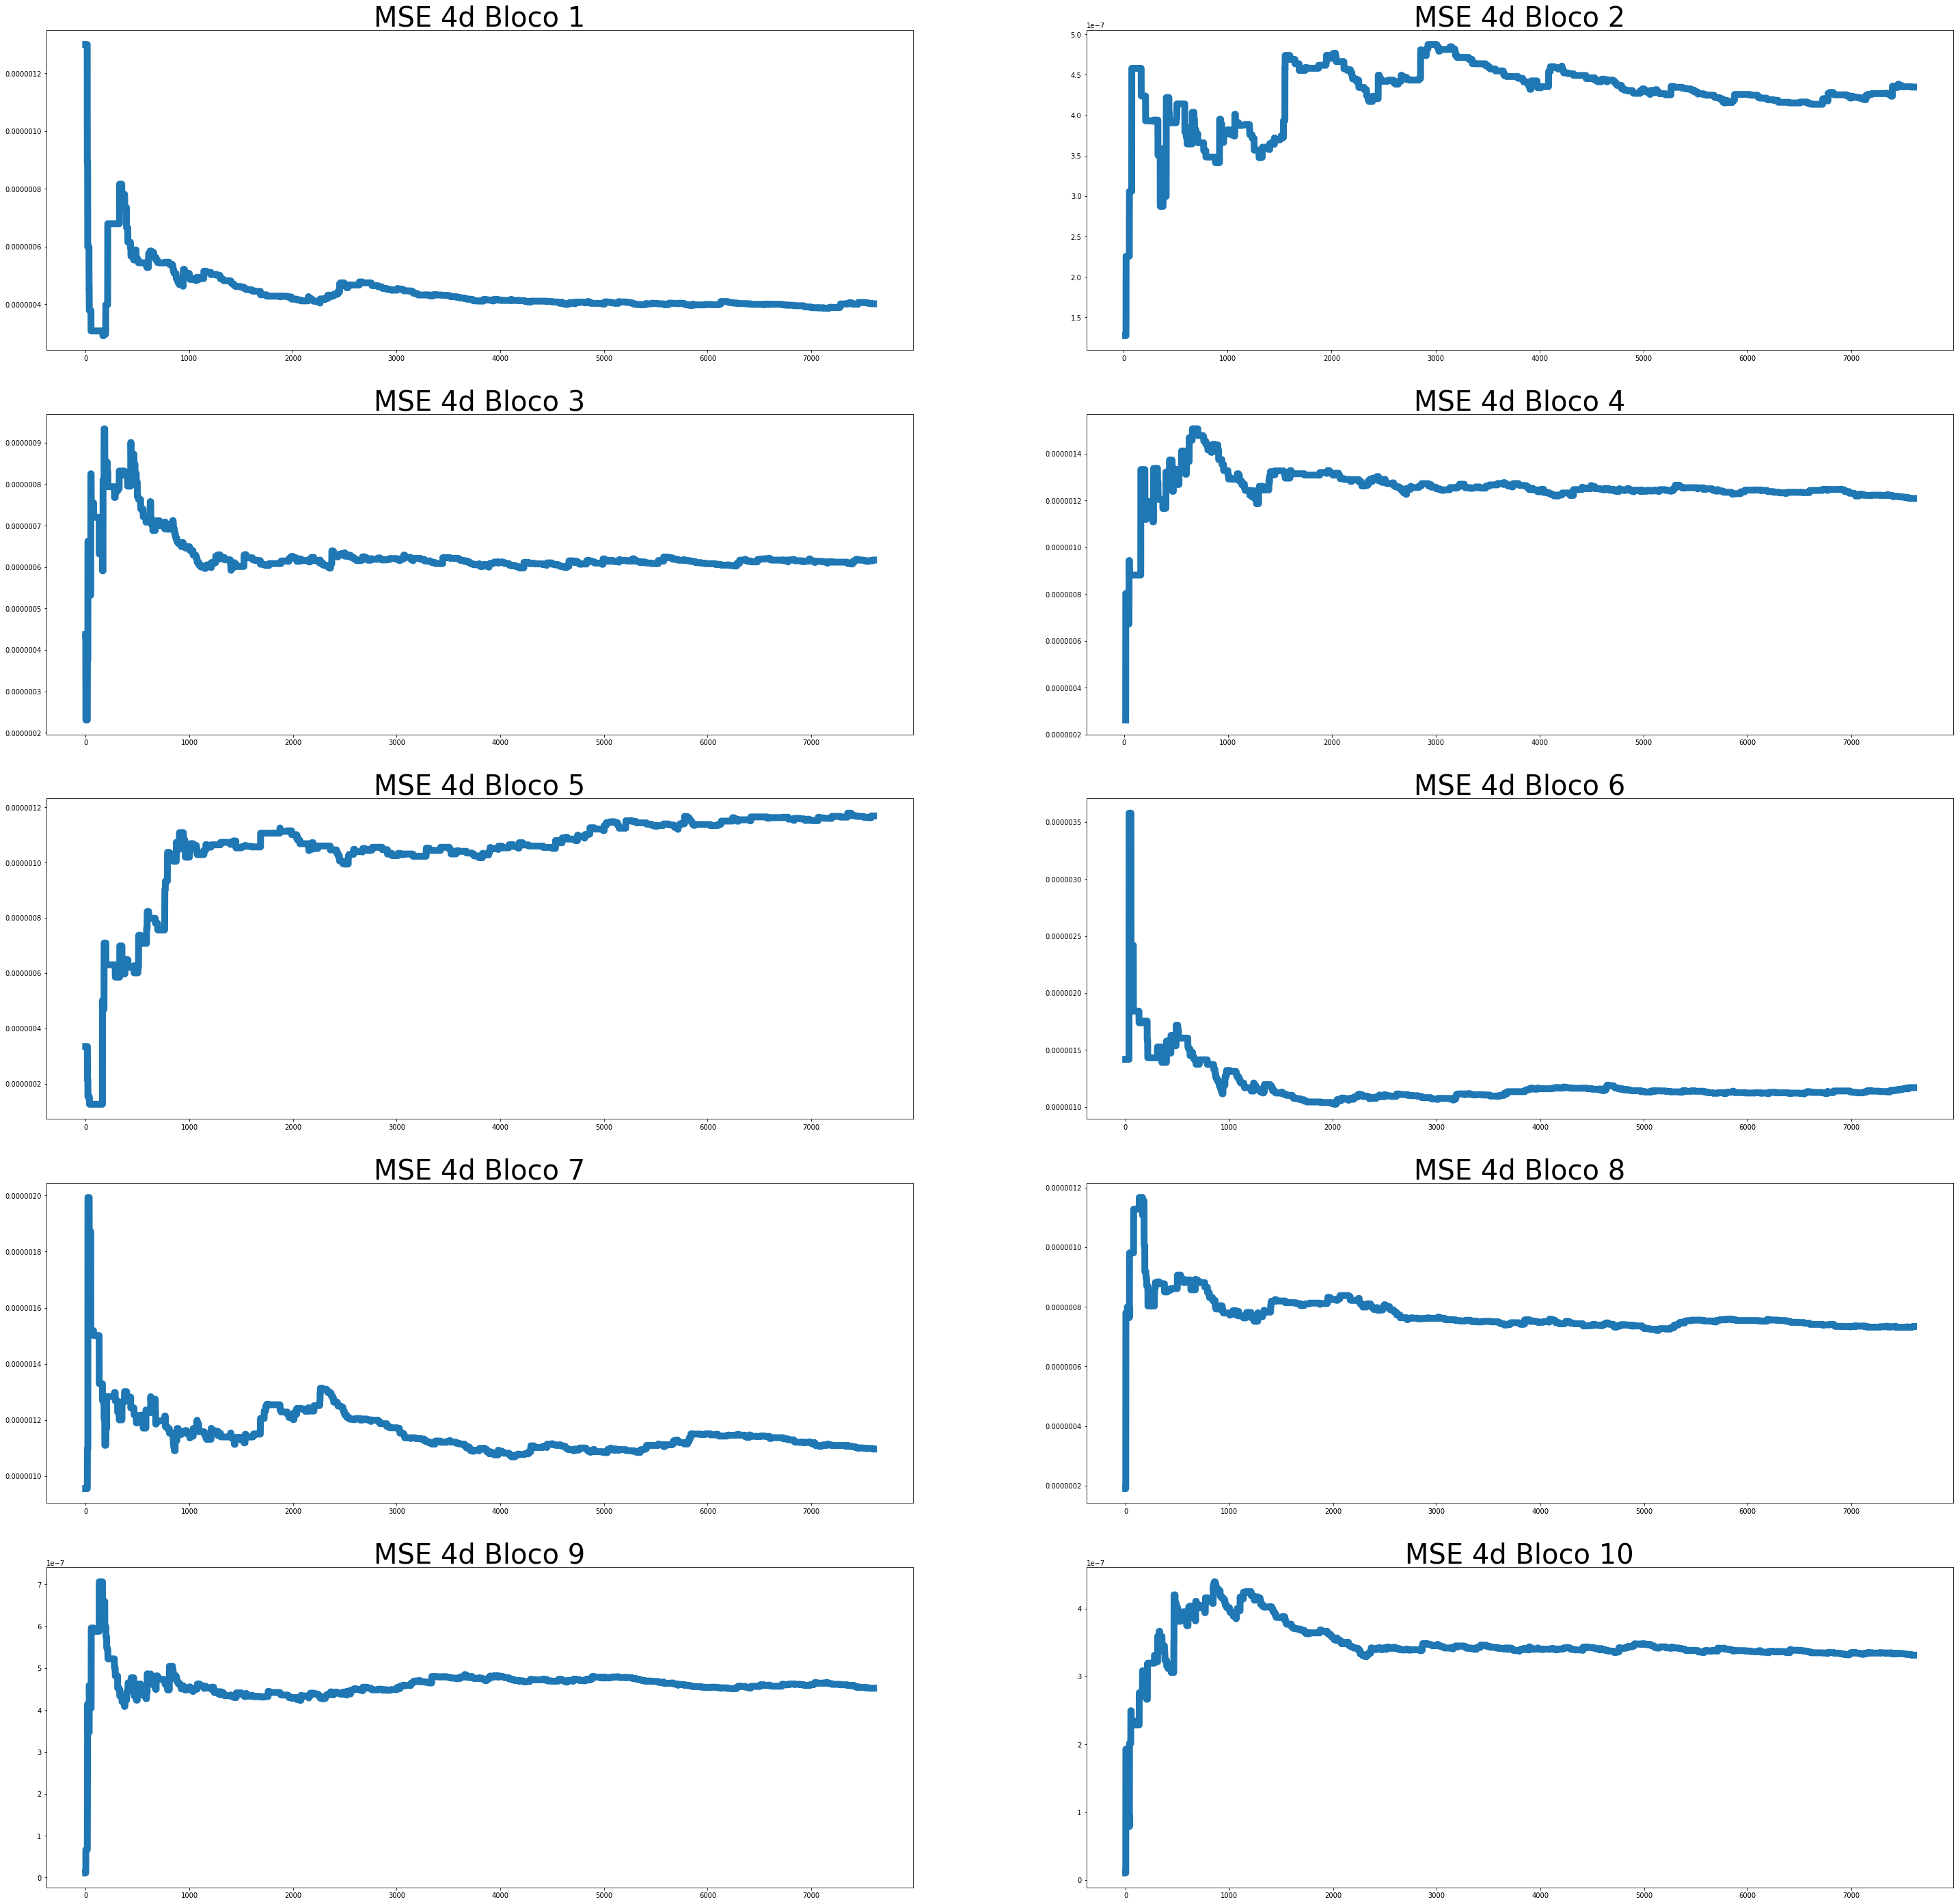

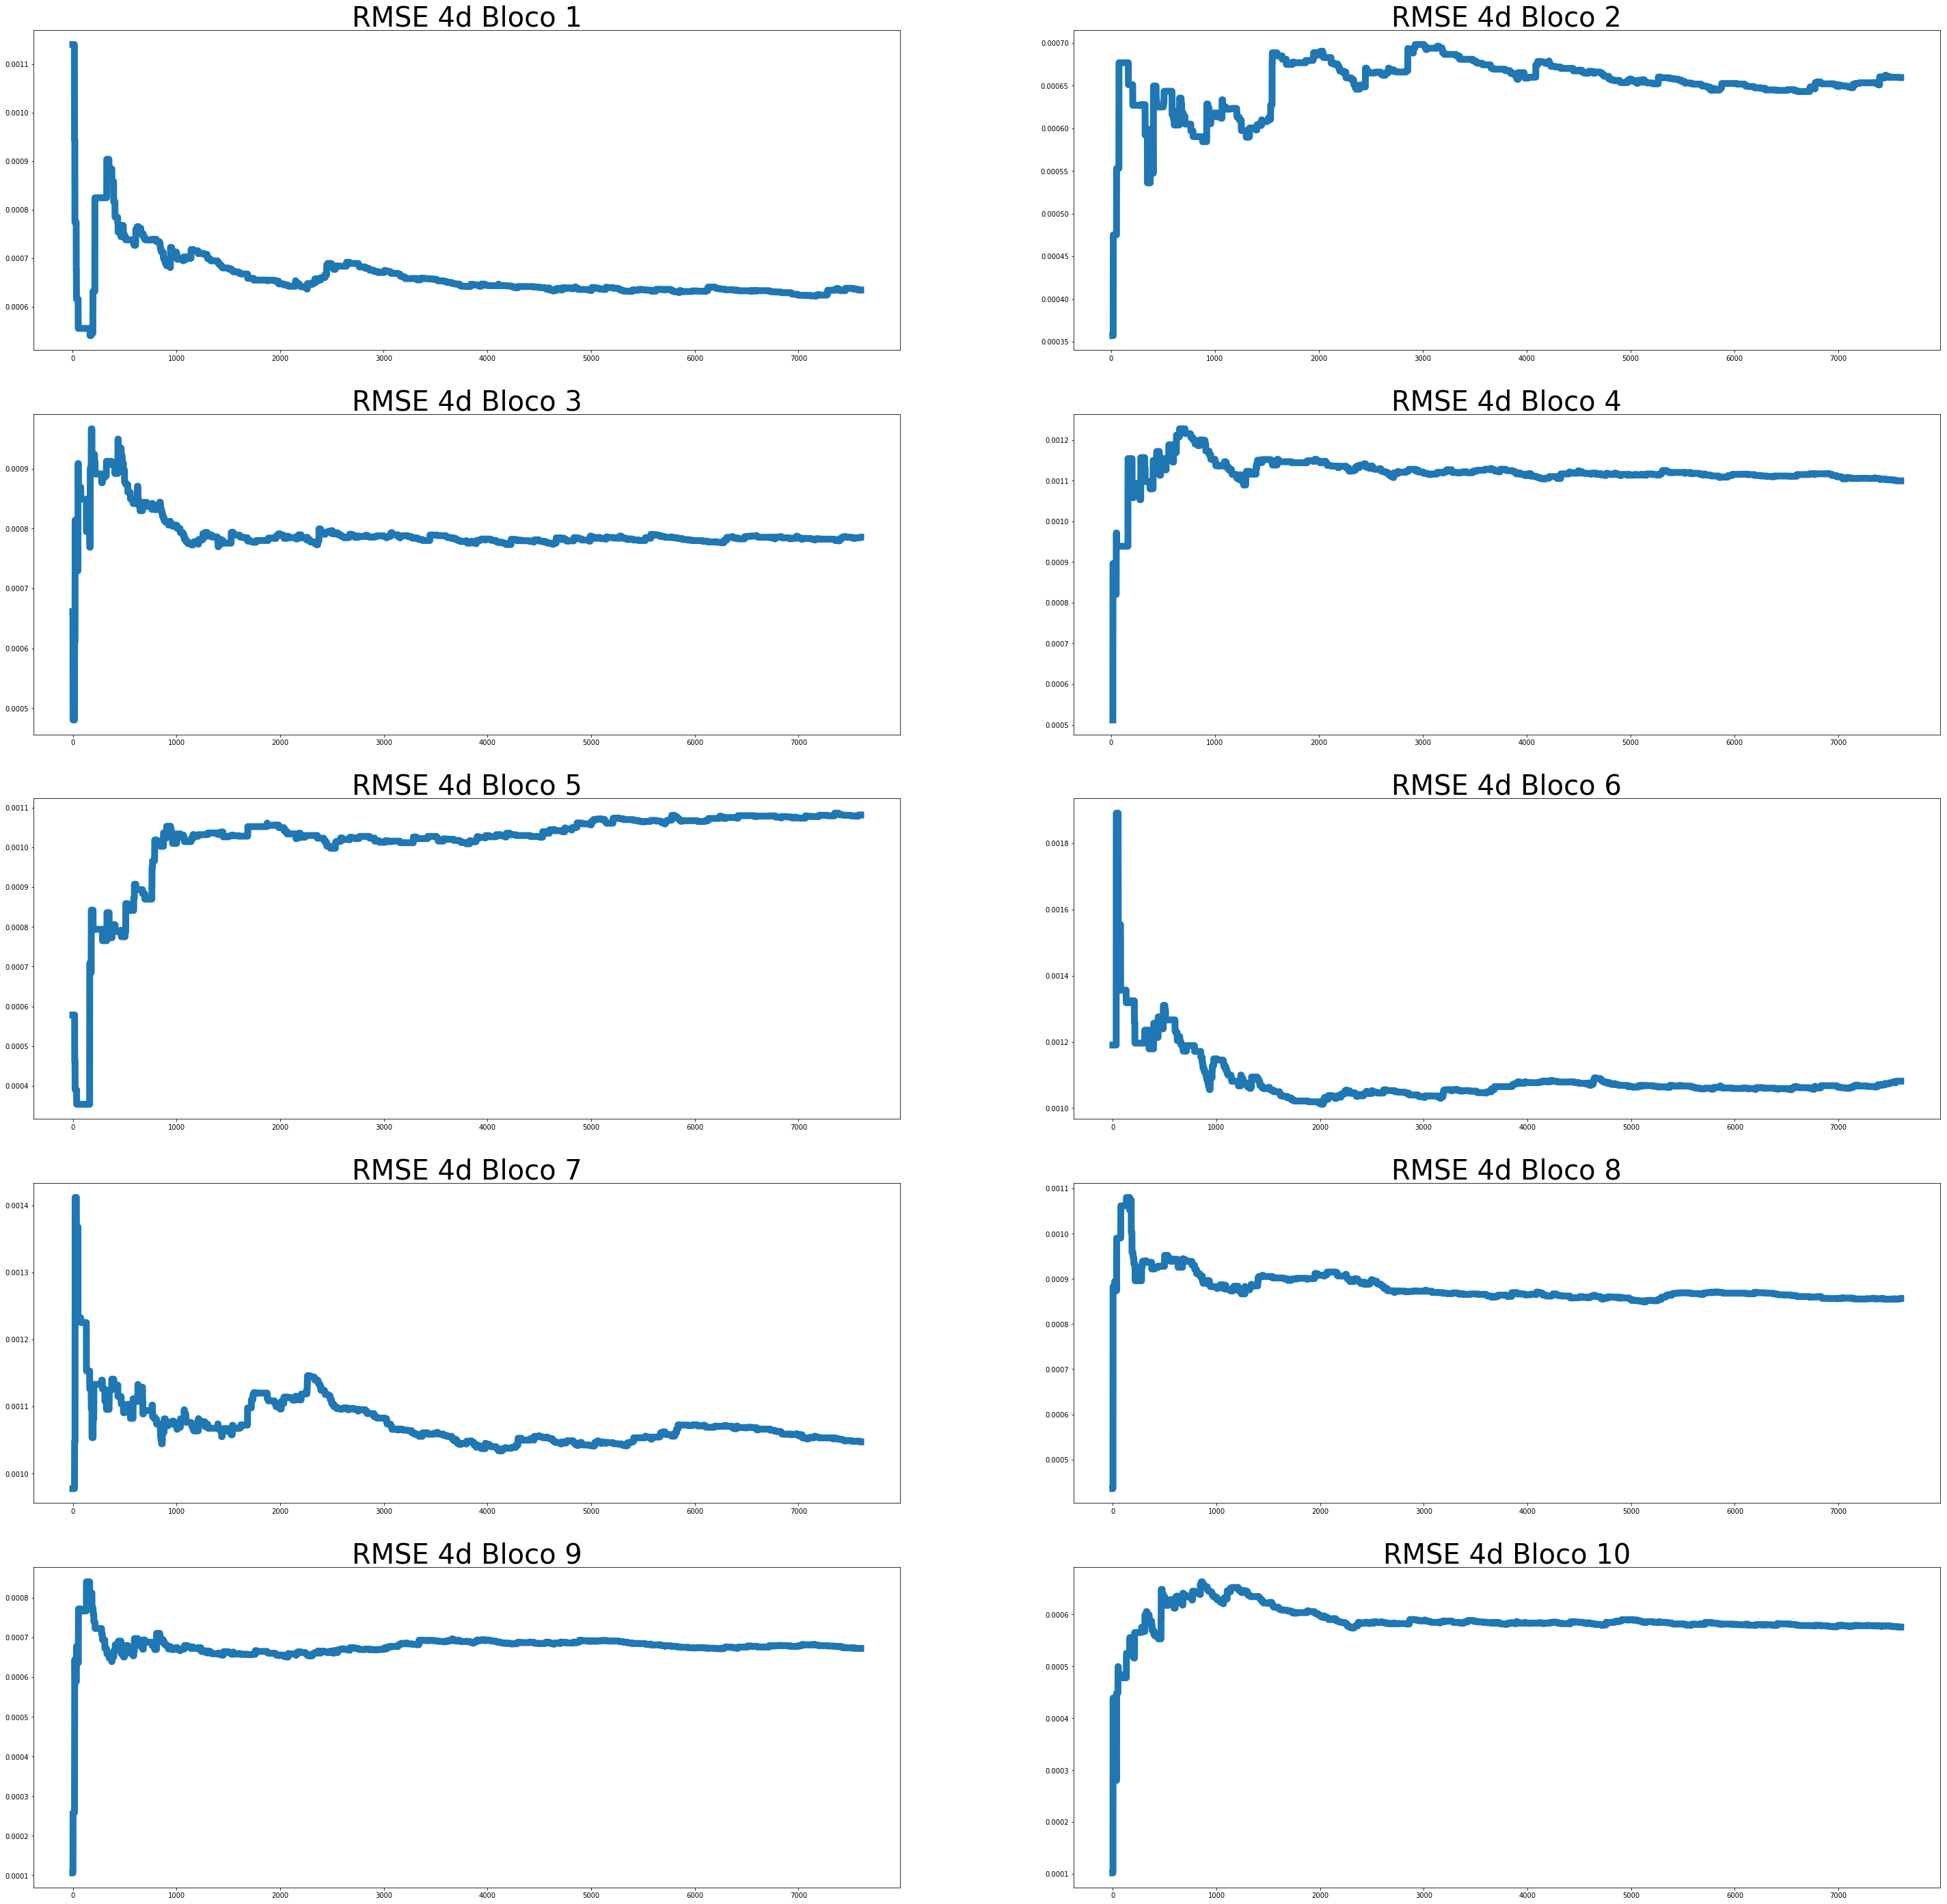

In [5]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



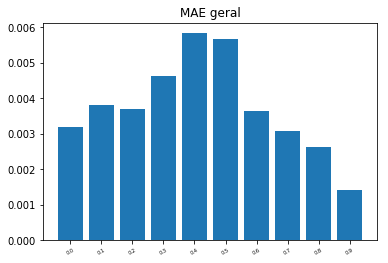

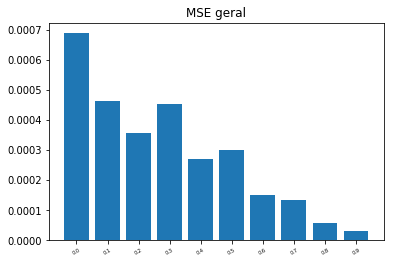

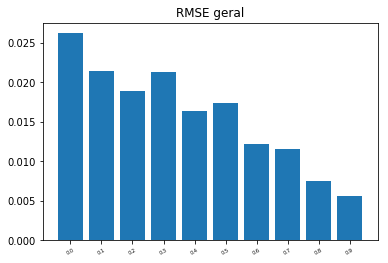


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



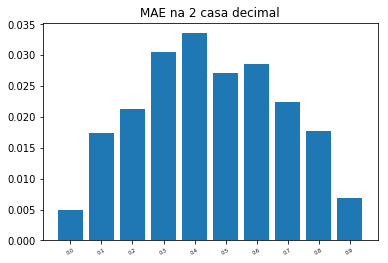

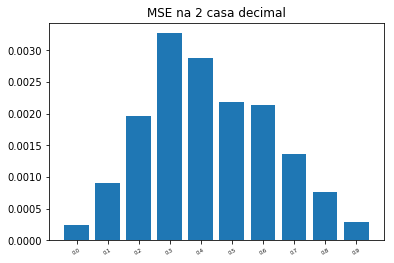

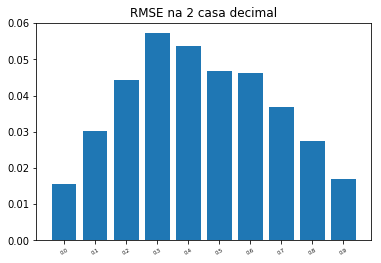


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



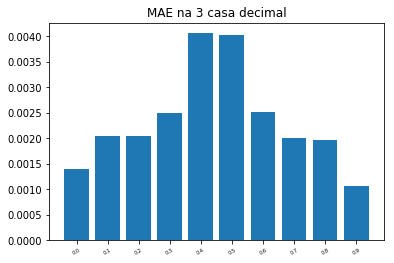

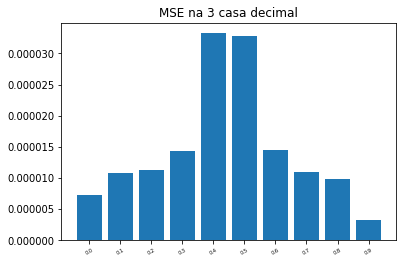

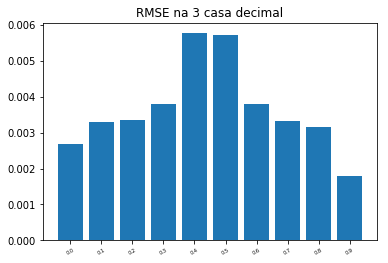


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



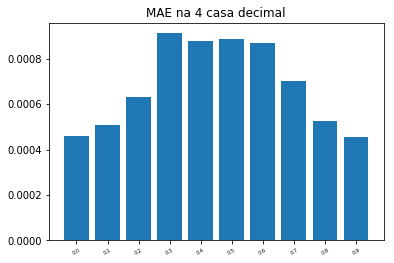

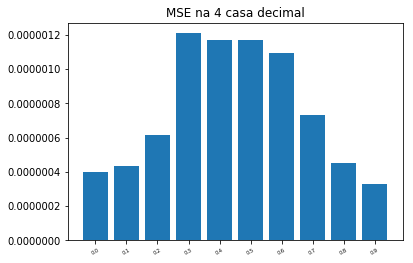

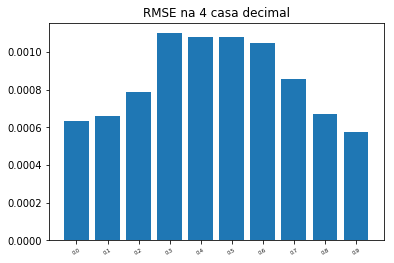

In [6]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
